## Goal: 
To find insights, hidden patterns, and forecast trends; anything related to financial and risk forecasting, as well as ideal customer profile (ICP).
   


In [75]:
!pip install autoviz

## Import and setup

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import pygwalker as pyg
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset and see first 10 rows
filename = "insurance_data_sample.csv"
df = pd.read_csv(filename)

#Converting Date column to pd.date format
df['Date'] = pd.to_datetime(df['Date'])

print(tabulate(df.head(10), headers = df.columns, tablefmt = 'psql'))

+----+--------------+---------------------+-----------------+----------+-----------------+-------------------------------------+------------+------------+-----------------------------+----------------+------------+-------------+--------------+--------------+---------+-----------------------------+----------------+-----------+
|    | Car_id       | Date                | Customer Name   | Gender   |   Annual Income | Dealer_Name                         | Company    | Model      | Engine                      | Transmission   | Color      |   Price ($) | Dealer_No    | Body Style   |   Phone |   Amount_paid_for_insurance |   Claim amount | City      |
|----+--------------+---------------------+-----------------+----------+-----------------+-------------------------------------+------------+------------+-----------------------------+----------------+------------+-------------+--------------+--------------+---------+-----------------------------+----------------+-----------|
|  0 | C_CND_000

In [3]:
print(tabulate(df.tail(), headers = df.columns, tablefmt = 'psql'))

+-------+--------------+---------------------+-----------------+----------+-----------------+--------------------------------+-----------+---------+-----------------------------+----------------+------------+-------------+--------------+--------------+---------+-----------------------------+----------------+---------+
|       | Car_id       | Date                | Customer Name   | Gender   |   Annual Income | Dealer_Name                    | Company   | Model   | Engine                      | Transmission   | Color      |   Price ($) | Dealer_No    | Body Style   |   Phone |   Amount_paid_for_insurance |   Claim amount | City    |
|-------+--------------+---------------------+-----------------+----------+-----------------+--------------------------------+-----------+---------+-----------------------------+----------------+------------+-------------+--------------+--------------+---------+-----------------------------+----------------+---------|
| 23901 | C_CND_023902 | 2023-12-31 00:0

## Initial overview of data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Car_id                     23906 non-null  object        
 1   Date                       23906 non-null  datetime64[ns]
 2   Customer Name              23906 non-null  object        
 3   Gender                     23906 non-null  object        
 4   Annual Income              23906 non-null  int64         
 5   Dealer_Name                23906 non-null  object        
 6   Company                    23906 non-null  object        
 7   Model                      23906 non-null  object        
 8   Engine                     23906 non-null  object        
 9   Transmission               23906 non-null  object        
 10  Color                      23906 non-null  object        
 11  Price ($)                  23906 non-null  int64         
 12  Deal

We can see the number of Rows and columns in the df. 
The columns and their types. 

In [5]:
#get missing values and Unique values in df
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n", df.nunique())


Missing values :   0

Unique values :  
 Car_id                       23906
Date                           612
Customer Name                 3022
Gender                           2
Annual Income                 2508
Dealer_Name                     28
Company                         30
Model                          154
Engine                           2
Transmission                     2
Color                            3
Price ($)                      870
Dealer_No                        7
Body Style                       5
Phone                        23804
Amount_paid_for_insurance     3421
Claim amount                   230
City                             6
dtype: int64


We can see, Car_id and Phone have more than 99% unique values. So, we can remove them as they do not provide usable insights. 

In [6]:
df.drop(["Car_id", "Phone", "Customer Name"], axis=1, inplace=True)
df.columns

Index(['Date', 'Gender', 'Annual Income', 'Dealer_Name', 'Company', 'Model',
       'Engine', 'Transmission', 'Color', 'Price ($)', 'Dealer_No ',
       'Body Style', 'Amount_paid_for_insurance', 'Claim amount', 'City'],
      dtype='object')

In our dataset, we have two types of columns: Categorical and Numeric.

- **Temporal Variables**
  - 'Date': This column provides valuable temporal information. We can extract features such as year, month, and day, which can enhance our modeling process.

- **Categorical Variables**
  - 'Gender', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Dealer_No', 'Body Style', 'City': These columns represent categorical attributes. They may require encoding techniques like one-hot encoding for modeling.

- **Quantitative Variables**
  - 'Annual Income', 'Price ($)', 'Amount_paid_for_insurance', 'Claim amount': These columns contain numerical data. They offer insights into financial aspects such as annual income, price, insurance amounts, and claim amounts.

In [86]:
# lets convert the datatype to category to save space and efficiency

cat_var = ['Gender', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Dealer_No ', 'Body Style', 'City']
for cat in cat_var:
    df[cat] = df[cat].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       23906 non-null  datetime64[ns]
 1   Gender                     23906 non-null  category      
 2   Annual Income              23906 non-null  int64         
 3   Dealer_Name                23906 non-null  category      
 4   Company                    23906 non-null  category      
 5   Model                      23906 non-null  category      
 6   Engine                     23906 non-null  category      
 7   Transmission               23906 non-null  category      
 8   Color                      23906 non-null  category      
 9   Price ($)                  23906 non-null  int64         
 10  Dealer_No                  23906 non-null  category      
 11  Body Style                 23906 non-null  category      
 12  Amou

In [85]:
df.describe()

Annual Income     Price ($)  Amount_paid_for_insurance  Claim amount
count   2.390600e+04  23906.000000               23906.000000  23906.000000
mean    8.308403e+05  28090.247846                1654.517778    282.463273
std     7.200064e+05  14788.687608                 753.481664    977.506527
min     1.008000e+04   1200.000000                 103.000000      0.000000
25%     3.860000e+05  18001.000000                1138.000000      0.000000
50%     7.350000e+05  23000.000000                1432.000000      0.000000
75%     1.175750e+06  34000.000000                1990.000000      0.000000
max     1.120000e+07  85800.000000                4762.000000   8560.000000

Based on the above description:

1. **Annual Income**:
   - The average annual income is approximately $830,840, with a considerable standard deviation of around $720,006, indicating significant variability in income levels.
   - Income ranges from a minimum of $10,080 to a maximum of $11,200,000.
   - The median income (50th percentile) is $735,000, indicating that half of the population has an income below this value.
   - The interquartile range (IQR), representing the middle 50% of incomes, ranges from $386,000 to $1,175,750.

2. **Price ($) (Presumably Price of the Product)**:
   - The average price of the products is around $28,090, with a standard deviation of approximately $14,788, suggesting variability in product prices.
   - Product prices range from $1,200 to $85,800.
   - The median price is $23,000, indicating that half of the products are priced below this value.
   - The interquartile range for prices lies between $18,001 and $34,000.

3. **Amount Paid for Insurance**:
   - On average, the amount paid for insurance is approximately $1,654, with a standard deviation of around $753.
   - The range of insurance payments varies from $103 to $4,762.
   - The median insurance payment is $1,432, indicating that half of the payments are below this value.
   - The interquartile range for insurance payments spans from $1,138 to $1,990.

4. **Claim Amount**:
   - The average claim amount is relatively low at $282.46, with a high standard deviation of $977.51, indicating significant variability in claim amounts.
   - Claims range from a minimum of $0 to a maximum of $8,560.
   - Notably, the median claim amount is $0, suggesting that a significant portion of claims may be zero or very low.
   - The interquartile range for claim amounts is also $0, indicating that at least 75% of the claims fall within this range.

In [9]:
df.describe(include="category")

Gender                                      Dealer_Name    Company  \
count   23906                                            23906      23906   
unique      2                                               28         30   
top      Male  Progressive Shippers Cooperative Association No  Chevrolet   
freq    18798                                             1318       1819   

           Model                       Engine Transmission       Color  \
count      23906                        23906        23906       23906   
unique       154                            2            2           3   
top     Diamante  DoubleÃ‚Â Overhead Camshaft         Auto  Pale White   
freq         418                        12571        12571       11256   

        Dealer_No  Body Style     City  
count        23906      23906    23906  
unique           7          5        6  
top     85257-3102        SUV  Liepaja  
freq          3814       6374     4057

observations based on the above output :

1. **Gender**:
   - There are 2 unique categories: Male and Female.
   - The majority of the entries (18798 out of 23906) are labeled as Male.

2. **Dealer_Name**:
   - There are 28 unique dealer names.
   - The most frequent dealer name is "Progressive Shippers Cooperative Association No", occurring 1318 times.

3. **Company**:
   - There are 30 unique car companies.
   - The most common company is "Chevrolet", with 1819 occurrences.

4. **Model**:
   - There are 154 unique models of cars.
   - The most frequent model is "Diamante", appearing 418 times.

5. **Engine**:
   - There are 2 unique categories for the type of engine: Single Overhead Camshaft and Double Overhead Camshaft.
   - The Double Overhead Camshaft engine type is predominant, occurring 12571 times.

6. **Transmission**:
   - There are 2 unique categories for transmission: Auto and Manual.
   - Auto transmission is the most common, with 11256 instances.

7. **Color**:
   - There are 3 unique color categories: Pale White, Silver, and Black.
   - Pale White is the most frequent color, appearing 11256 times.

8. **Dealer_No**:
   - There are 7 unique dealer numbers.
   - The dealer number "85257-3102" is the most common, occurring 3814 times.

9. **Body Style**:
   - There are 5 unique body styles: SUV, Sedan, Coupe, Truck, and Hatchback.
   - The most common body style is SUV, with 6374 occurrences.

10. **City**:
   - There are 6 unique cities.
   - The city "Liepaja" appears most frequently, 4057 times.

##  Exploratory Data Analysis

### Univariate Analysis

In [87]:

def dist_box(data):
    """
    Plots a combined graph for univariate analysis of a continuous variable
    to check spread, central tendency, dispersion, and outliers.
    """
    # summary
    name = data.name.upper()
    mean = data.mean()
    median = data.median()
    mode = data.mode().tolist()[0]
    
    # figure and subplots
    fig, (ax_box, ax_dist) = plt.subplots(2, 1, 
                                          gridspec_kw={'height_ratios': (0.25, 0.75)}, 
                                          figsize=(10, 6), 
                                          sharex=True)
    
    palette = sns.color_palette("husl", 6)
    
    # box plot
    sns.boxplot(x=data, showmeans=True, palette=[palette[0]], ax=ax_box)
    ax_box.set(xlabel='')
    ax_box.set_title(f'Data Spread for {name}', fontsize=14, fontweight='bold')
    
    # dist plot
    sns.histplot(data, kde=True, color=palette[0], ax=ax_dist)
    ax_dist.axvline(mean, color=palette[5], linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
    ax_dist.axvline(median, color=palette[4], linestyle='-', linewidth=2, label=f'Median: {median:.2f}')
    ax_dist.axvline(mode, color=palette[2], linestyle='-', linewidth=2, label=f'Mode: {mode:.2f}')
    
    #legend and layout
    ax_dist.legend()
    ax_dist.set_xlabel(name, fontsize=12)
    ax_dist.set_ylabel('Count', fontsize=12)
    
    plt.tight_layout()
    plt.show()

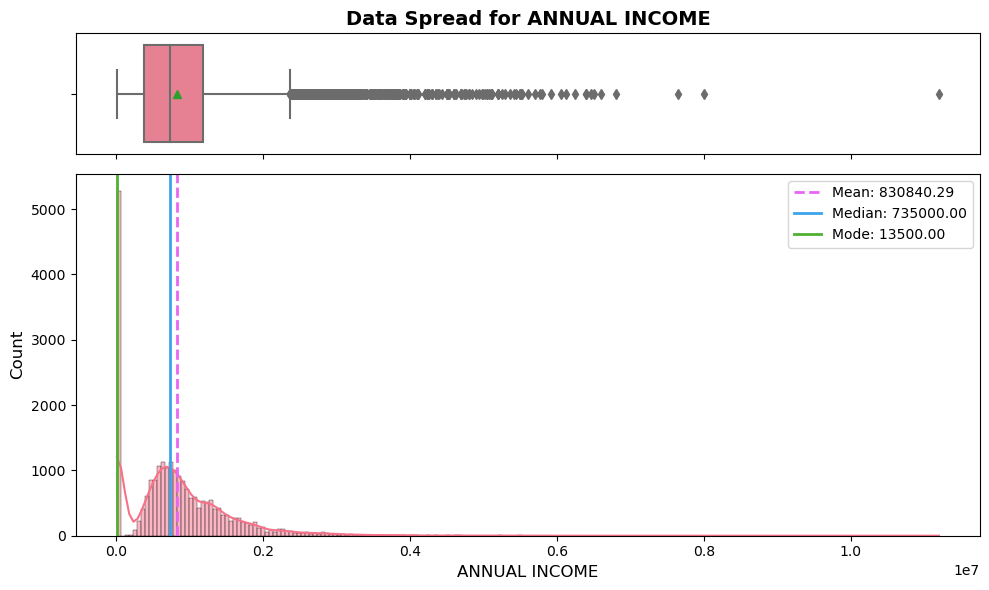

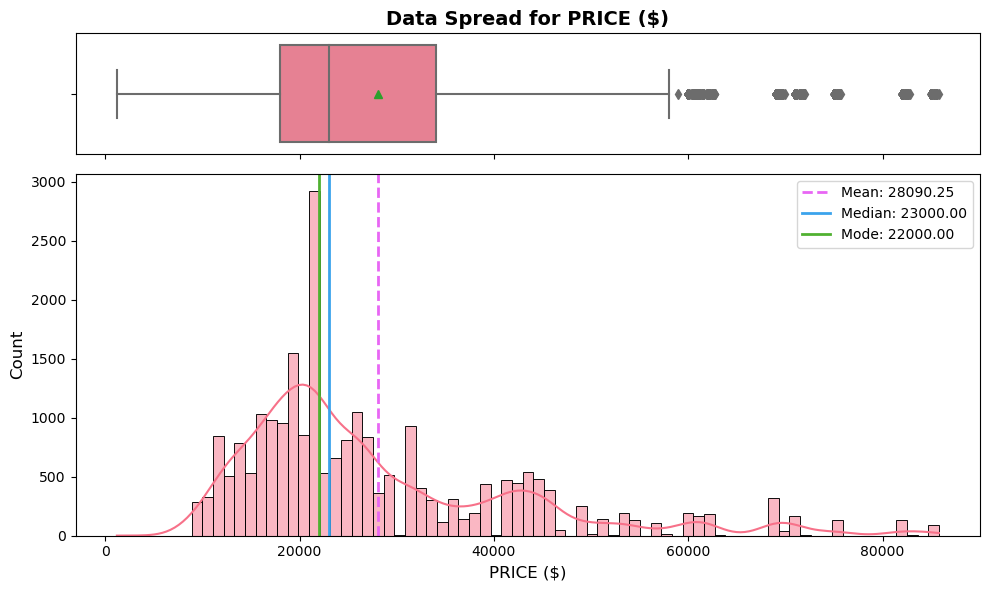

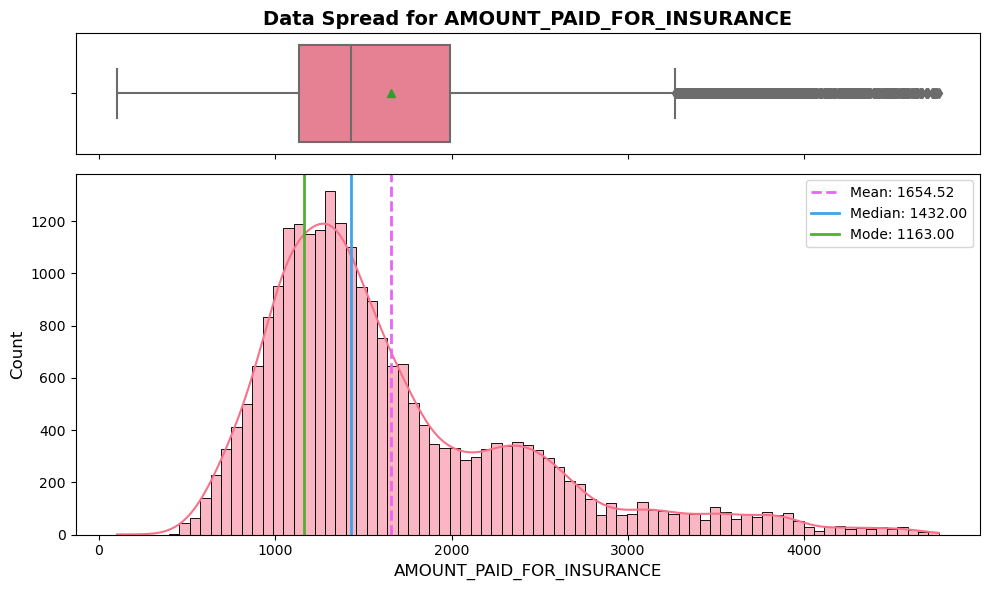

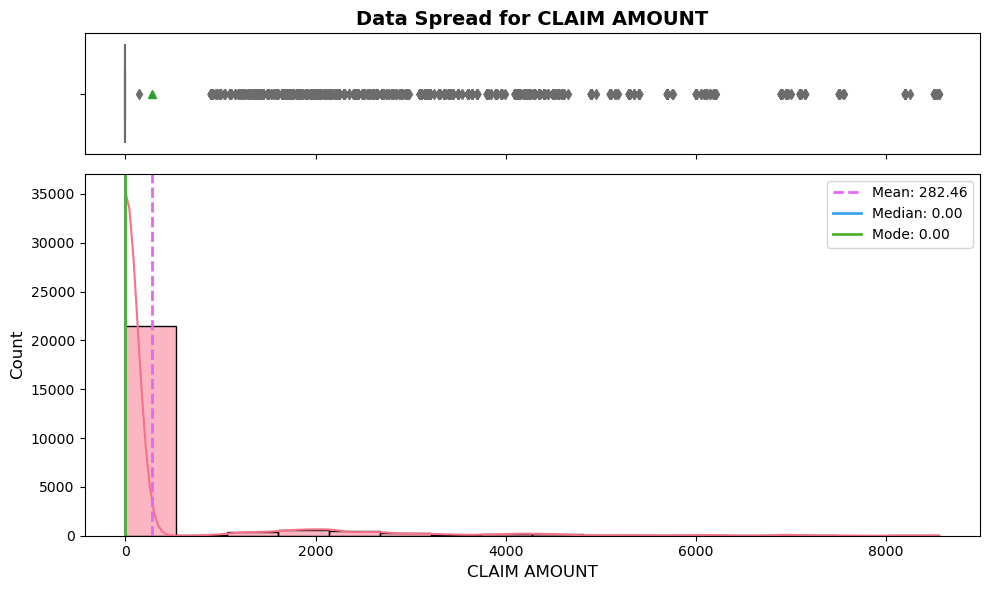

In [88]:
#select all quantitative columns for checking the spread
list_col=  df.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

#### Exploring Categorical Univariate distributions

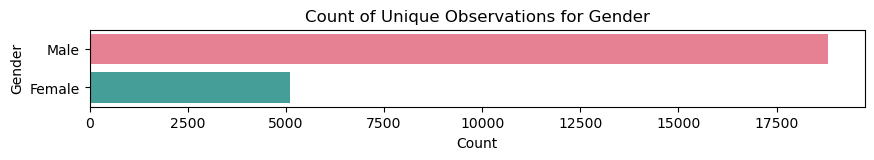

Unique value counts for Gender:
Male      18798
Female     5108
Name: Gender, dtype: int64
--------------------------------------------------



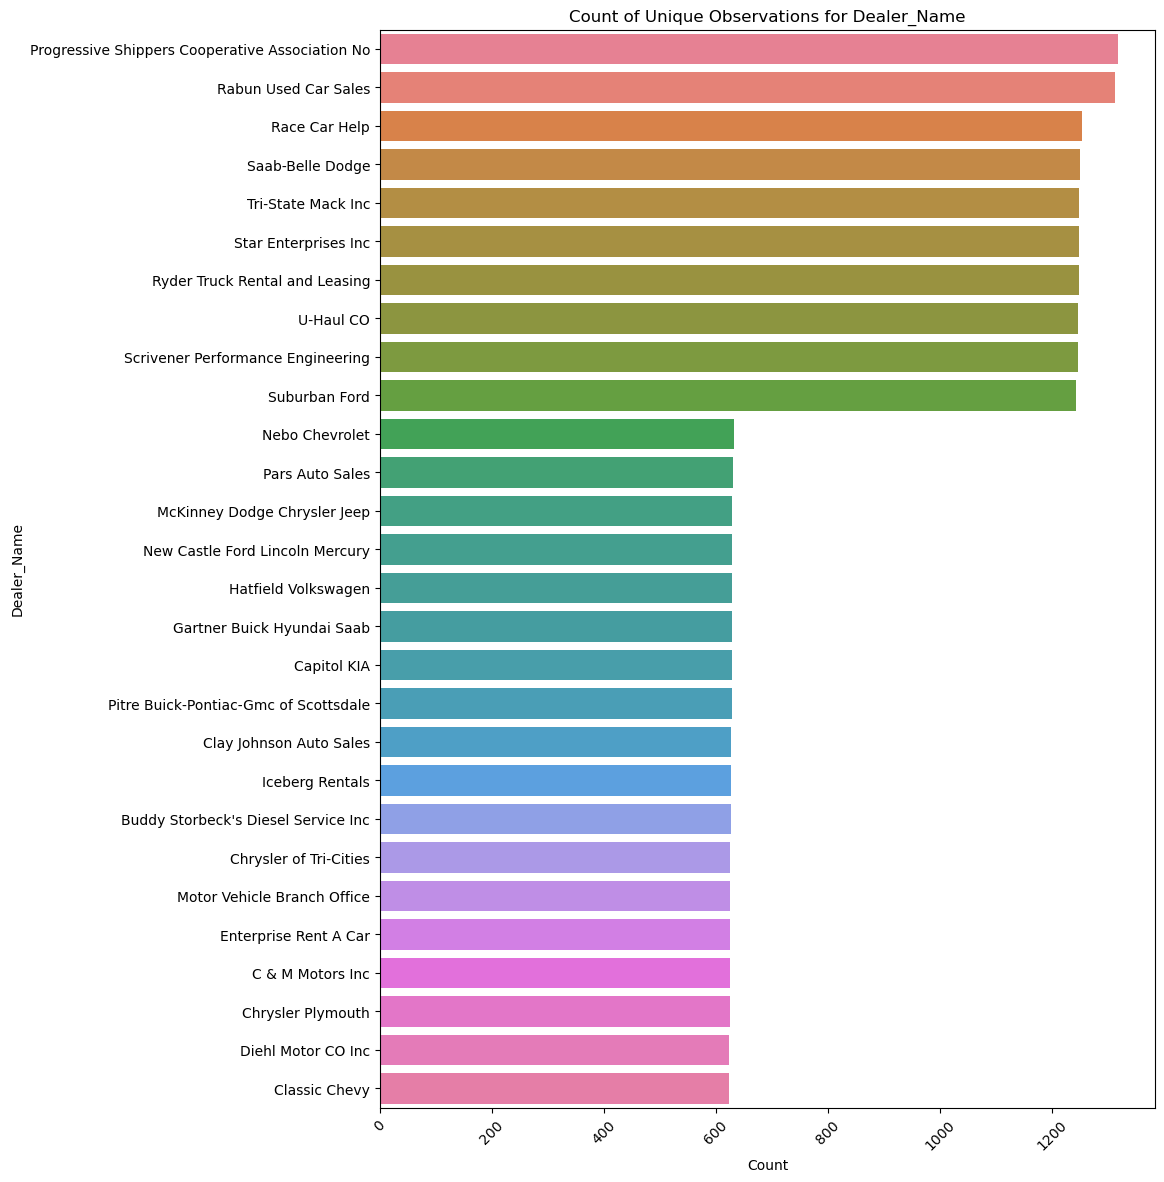

Unique value counts for Dealer_Name:
Progressive Shippers Cooperative Association No    1318
Rabun Used Car Sales                               1313
Race Car Help                                      1253
Saab-Belle Dodge                                   1251
Tri-State Mack Inc                                 1249
Star Enterprises Inc                               1249
Ryder Truck Rental and Leasing                     1248
U-Haul CO                                          1247
Scrivener Performance Engineering                  1246
Suburban Ford                                      1243
Nebo Chevrolet                                      633
Pars Auto Sales                                     630
McKinney Dodge Chrysler Jeep                        629
New Castle Ford Lincoln Mercury                     629
Hatfield Volkswagen                                 629
Gartner Buick Hyundai Saab                          628
Capitol KIA                                         628
Pitre Buick

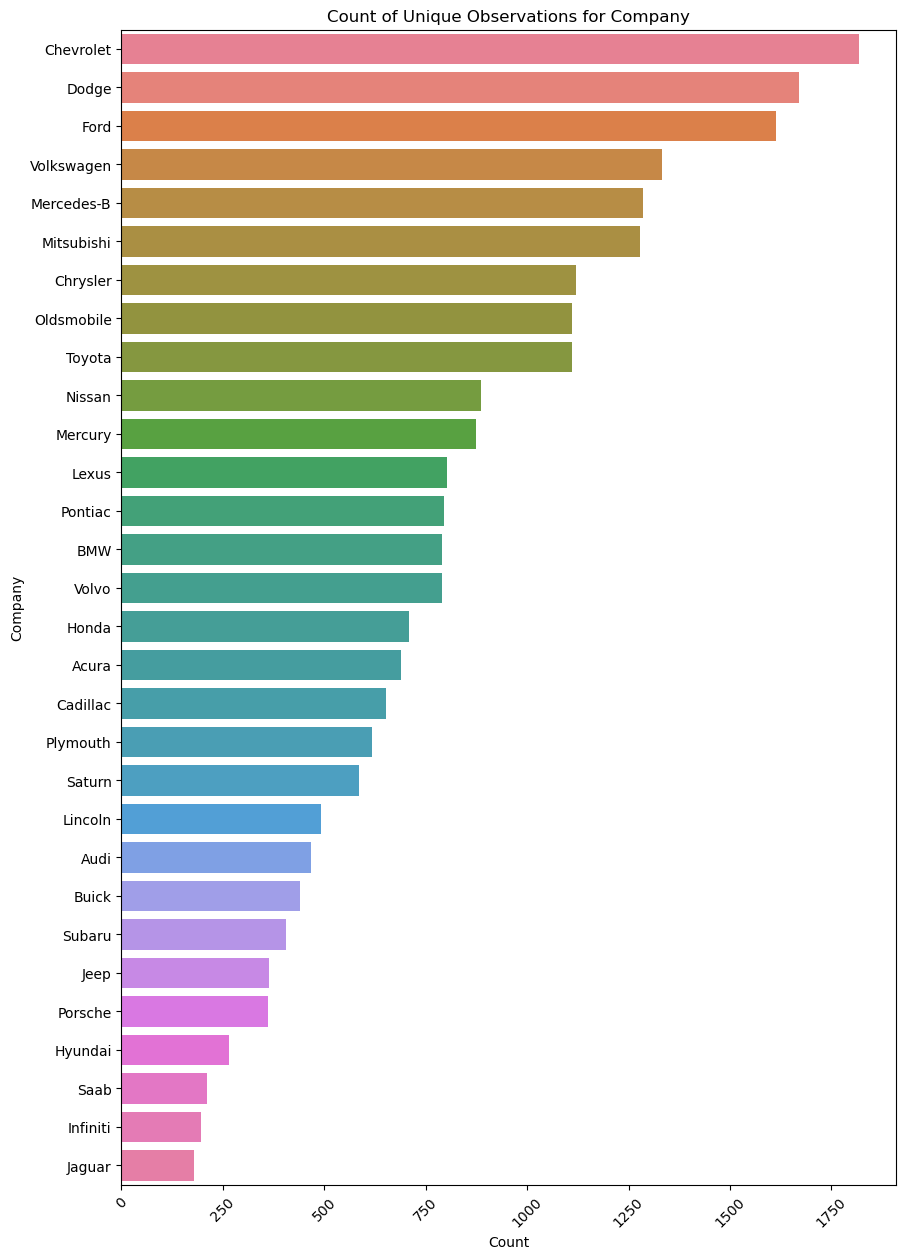

Unique value counts for Company:
Chevrolet     1819
Dodge         1671
Ford          1614
Volkswagen    1333
Mercedes-B    1285
Mitsubishi    1277
Chrysler      1120
Oldsmobile    1111
Toyota        1110
Nissan         886
Mercury        874
Lexus          802
Pontiac        796
BMW            790
Volvo          789
Honda          708
Acura          689
Cadillac       652
Plymouth       617
Saturn         586
Lincoln        492
Audi           468
Buick          439
Subaru         405
Jeep           363
Porsche        361
Hyundai        264
Saab           210
Infiniti       195
Jaguar         180
Name: Company, dtype: int64
--------------------------------------------------



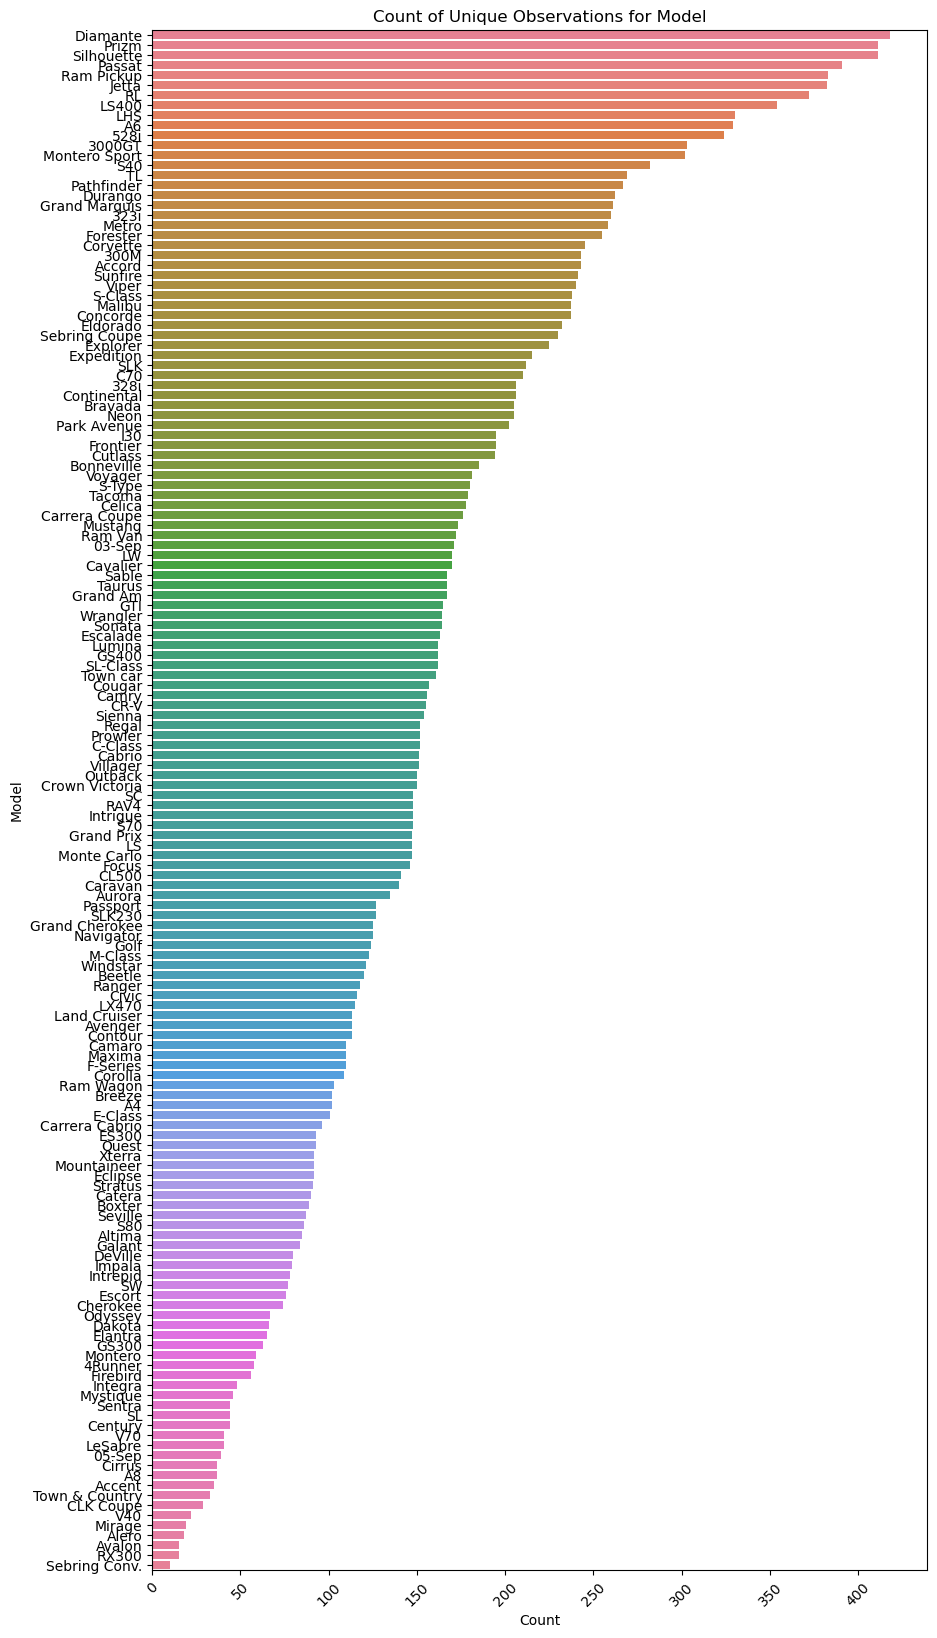

Unique value counts for Model:
Diamante         418
Prizm            411
Silhouette       411
Passat           391
Ram Pickup       383
                ... 
Mirage            19
Alero             18
Avalon            15
RX300             15
Sebring Conv.     10
Name: Model, Length: 154, dtype: int64
--------------------------------------------------



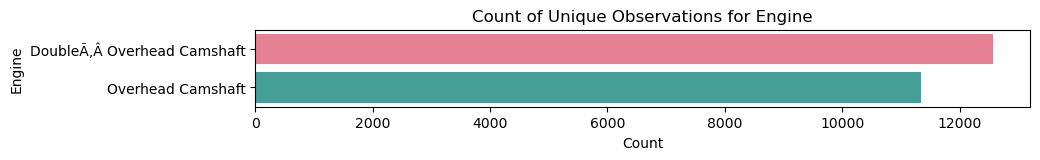

Unique value counts for Engine:
DoubleÃ‚Â Overhead Camshaft    12571
Overhead Camshaft              11335
Name: Engine, dtype: int64
--------------------------------------------------



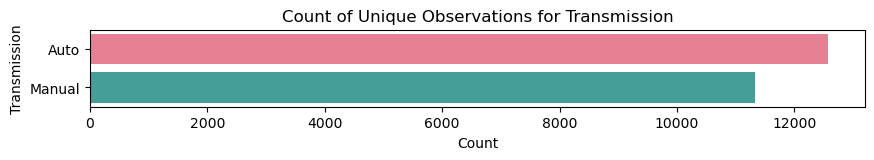

Unique value counts for Transmission:
Auto      12571
Manual    11335
Name: Transmission, dtype: int64
--------------------------------------------------



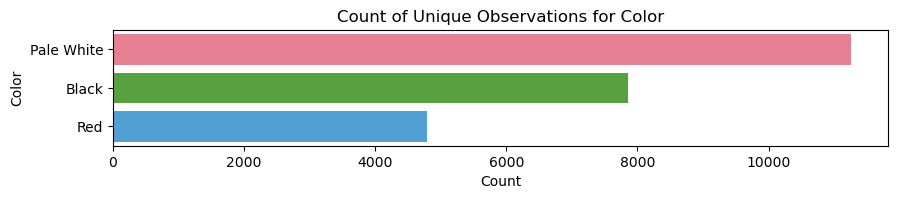

Unique value counts for Color:
Pale White    11256
Black          7857
Red            4793
Name: Color, dtype: int64
--------------------------------------------------



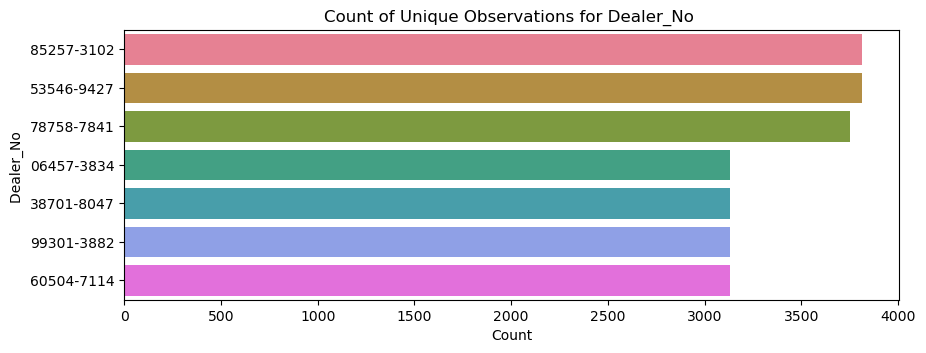

Unique value counts for Dealer_No :
85257-3102    3814
53546-9427    3813
78758-7841    3753
06457-3834    3132
38701-8047    3132
99301-3882    3132
60504-7114    3130
Name: Dealer_No , dtype: int64
--------------------------------------------------



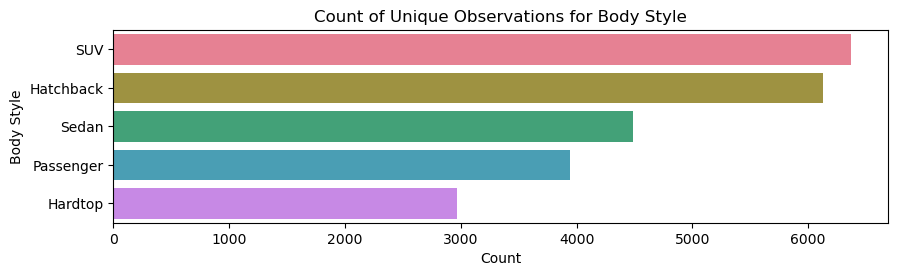

Unique value counts for Body Style:
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: Body Style, dtype: int64
--------------------------------------------------



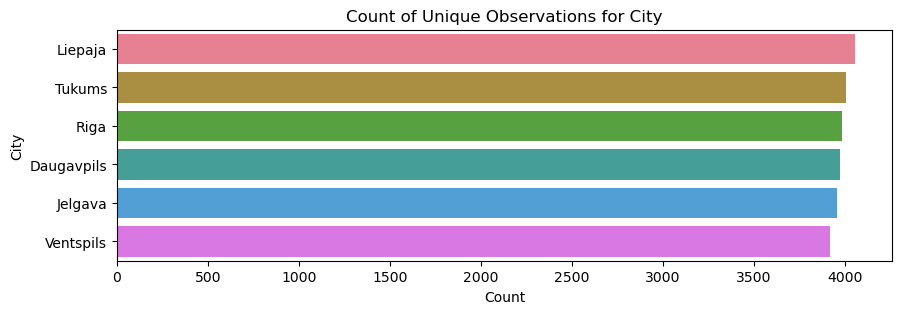

Unique value counts for City:
Liepaja       4057
Tukums        4008
Riga          3987
Daugavpils    3976
Jelgava       3960
Ventspils     3918
Name: City, dtype: int64
--------------------------------------------------



In [89]:
def plot_categorical_counts(df, cat_var):
  """
  Plots count plots for categorical variables and prints unique value counts.
  """

  for col in cat_var:
    #number of unique values
    num_unique_values = df[col].nunique()

    # figure height based on number of unique values
    plt.figure(figsize=(10, min(num_unique_values * 0.5, 20)))  #limitting max height at 20

    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='husl')
    plt.title(f'Count of Unique Observations for {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

    # x-tick rotation based on number of unique values (adjust factor as needed)
    if num_unique_values > 10:
      plt.xticks(rotation=45)
    else:
      plt.xticks(rotation=0)

    plt.show()

    # printing unique value counts
    print(f"Unique value counts for {col}:\n{df[col].value_counts()}\n{'-'*50}\n")

plot_categorical_counts(df, cat_var)

#### Birvariate Analysis

/var/folders/9z/1zsbrjl17xj_76sy78736hmr0000gn/T/ipykernel_69545/1207289962.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



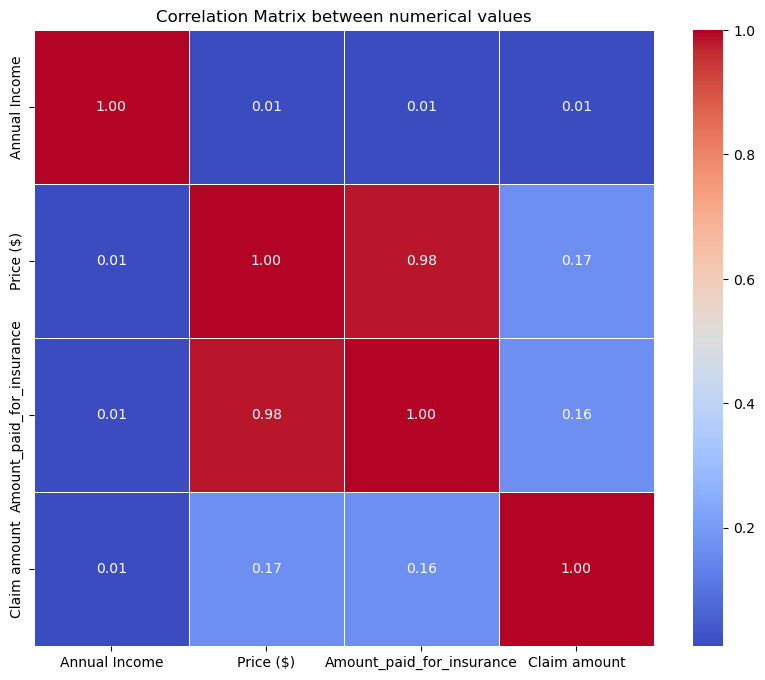

In [90]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between numerical values')
plt.show()

We can see Amount_paid_for_insurance and Price are higly correlated. It also means people buying expensive cars spend more on the insurance amount. So, we can keep only one of these variables while modelling

In [91]:
cat_columns=df.select_dtypes(['category']).columns
cat_columns

Index(['Gender', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission',
       'Color', 'Dealer_No ', 'Body Style', 'City'],
      dtype='object')

<Figure size 1200x1200 with 0 Axes>

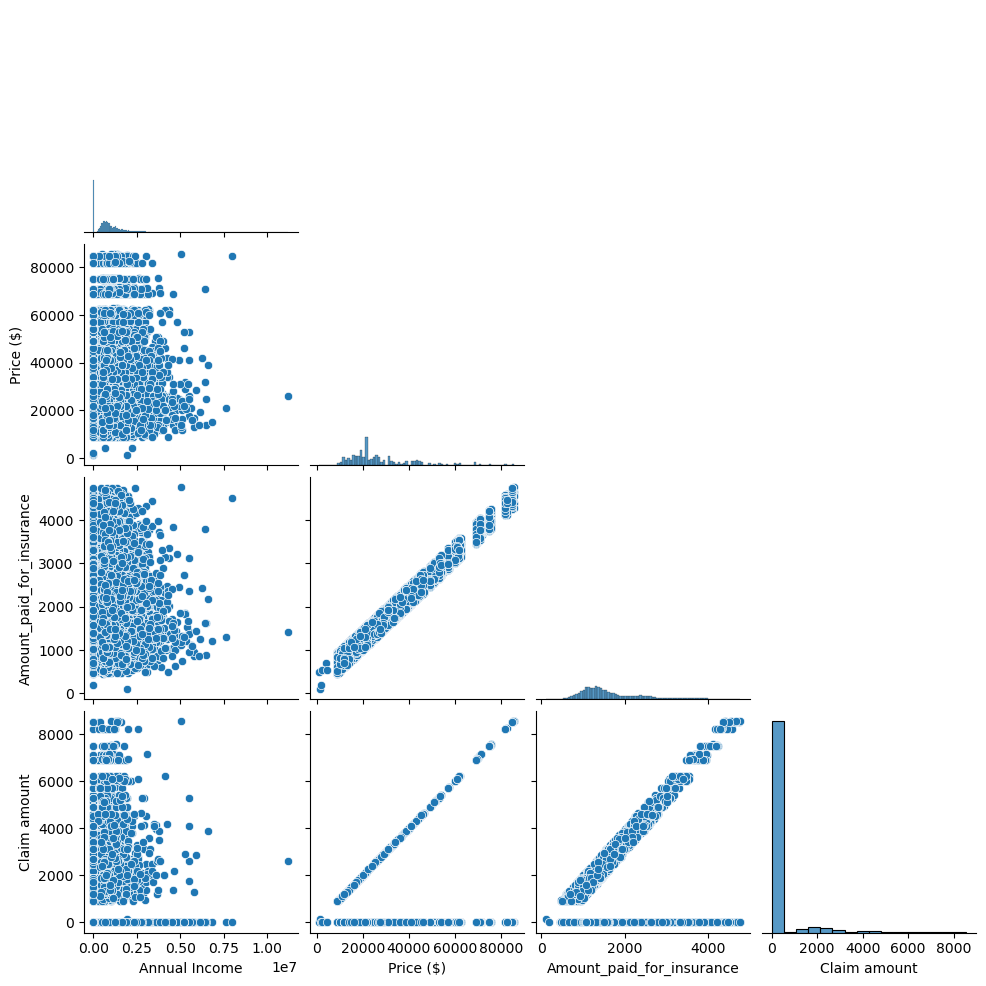

In [93]:
plt.figure(figsize=(12, 12))
sns.pairplot(data=df, corner=True)
plt.show()

Now, lets explore each categorical value with numerical values

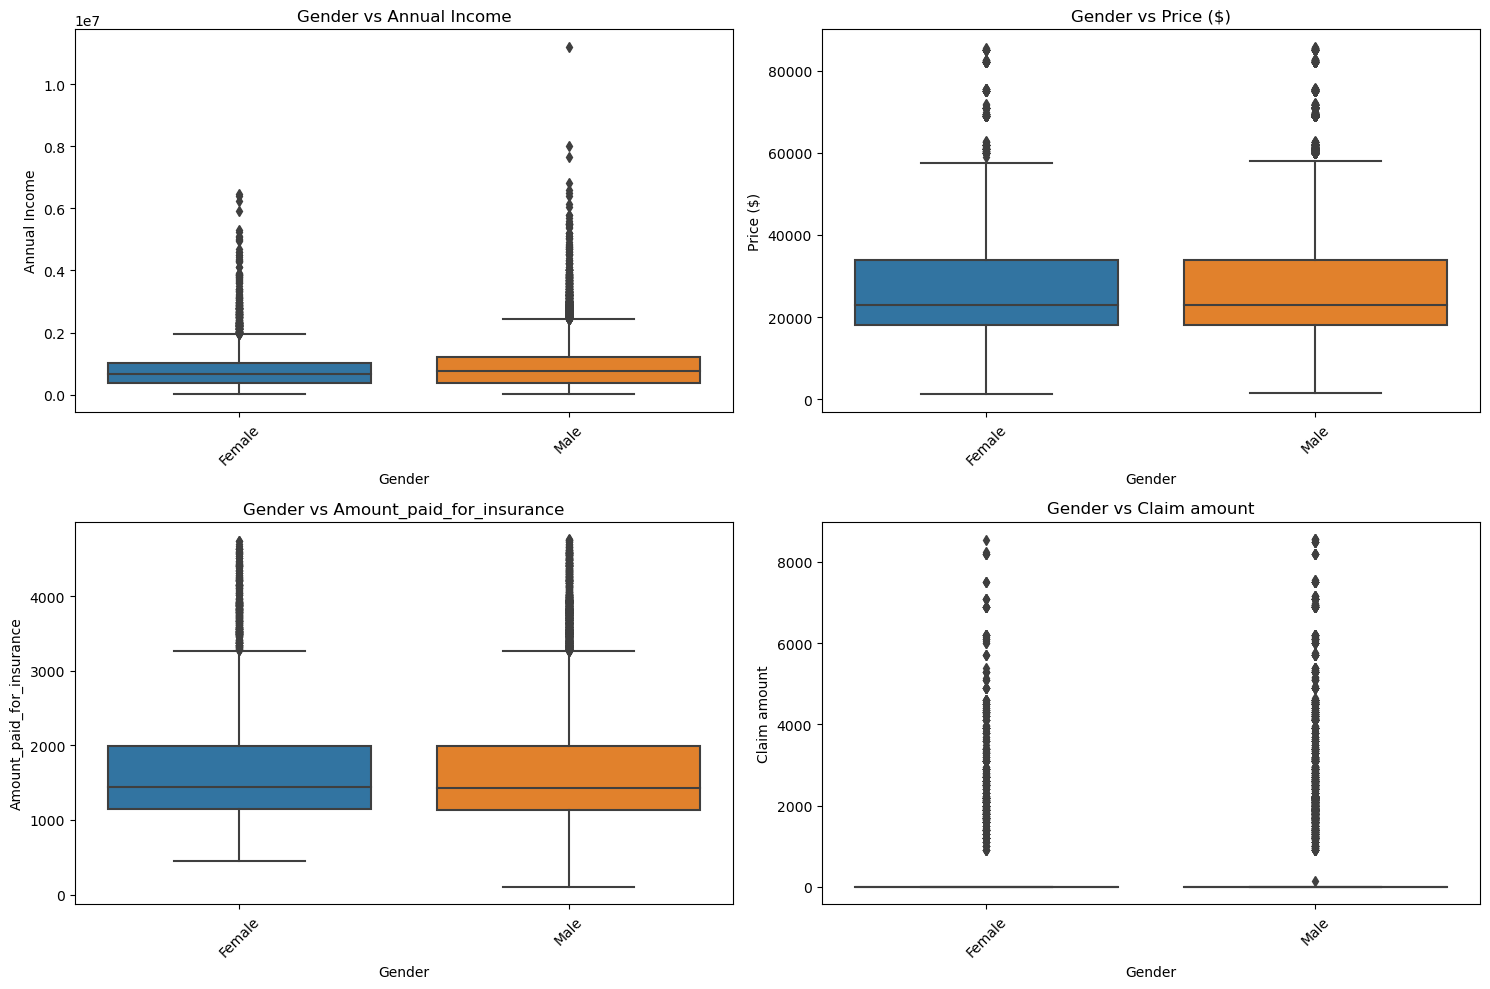

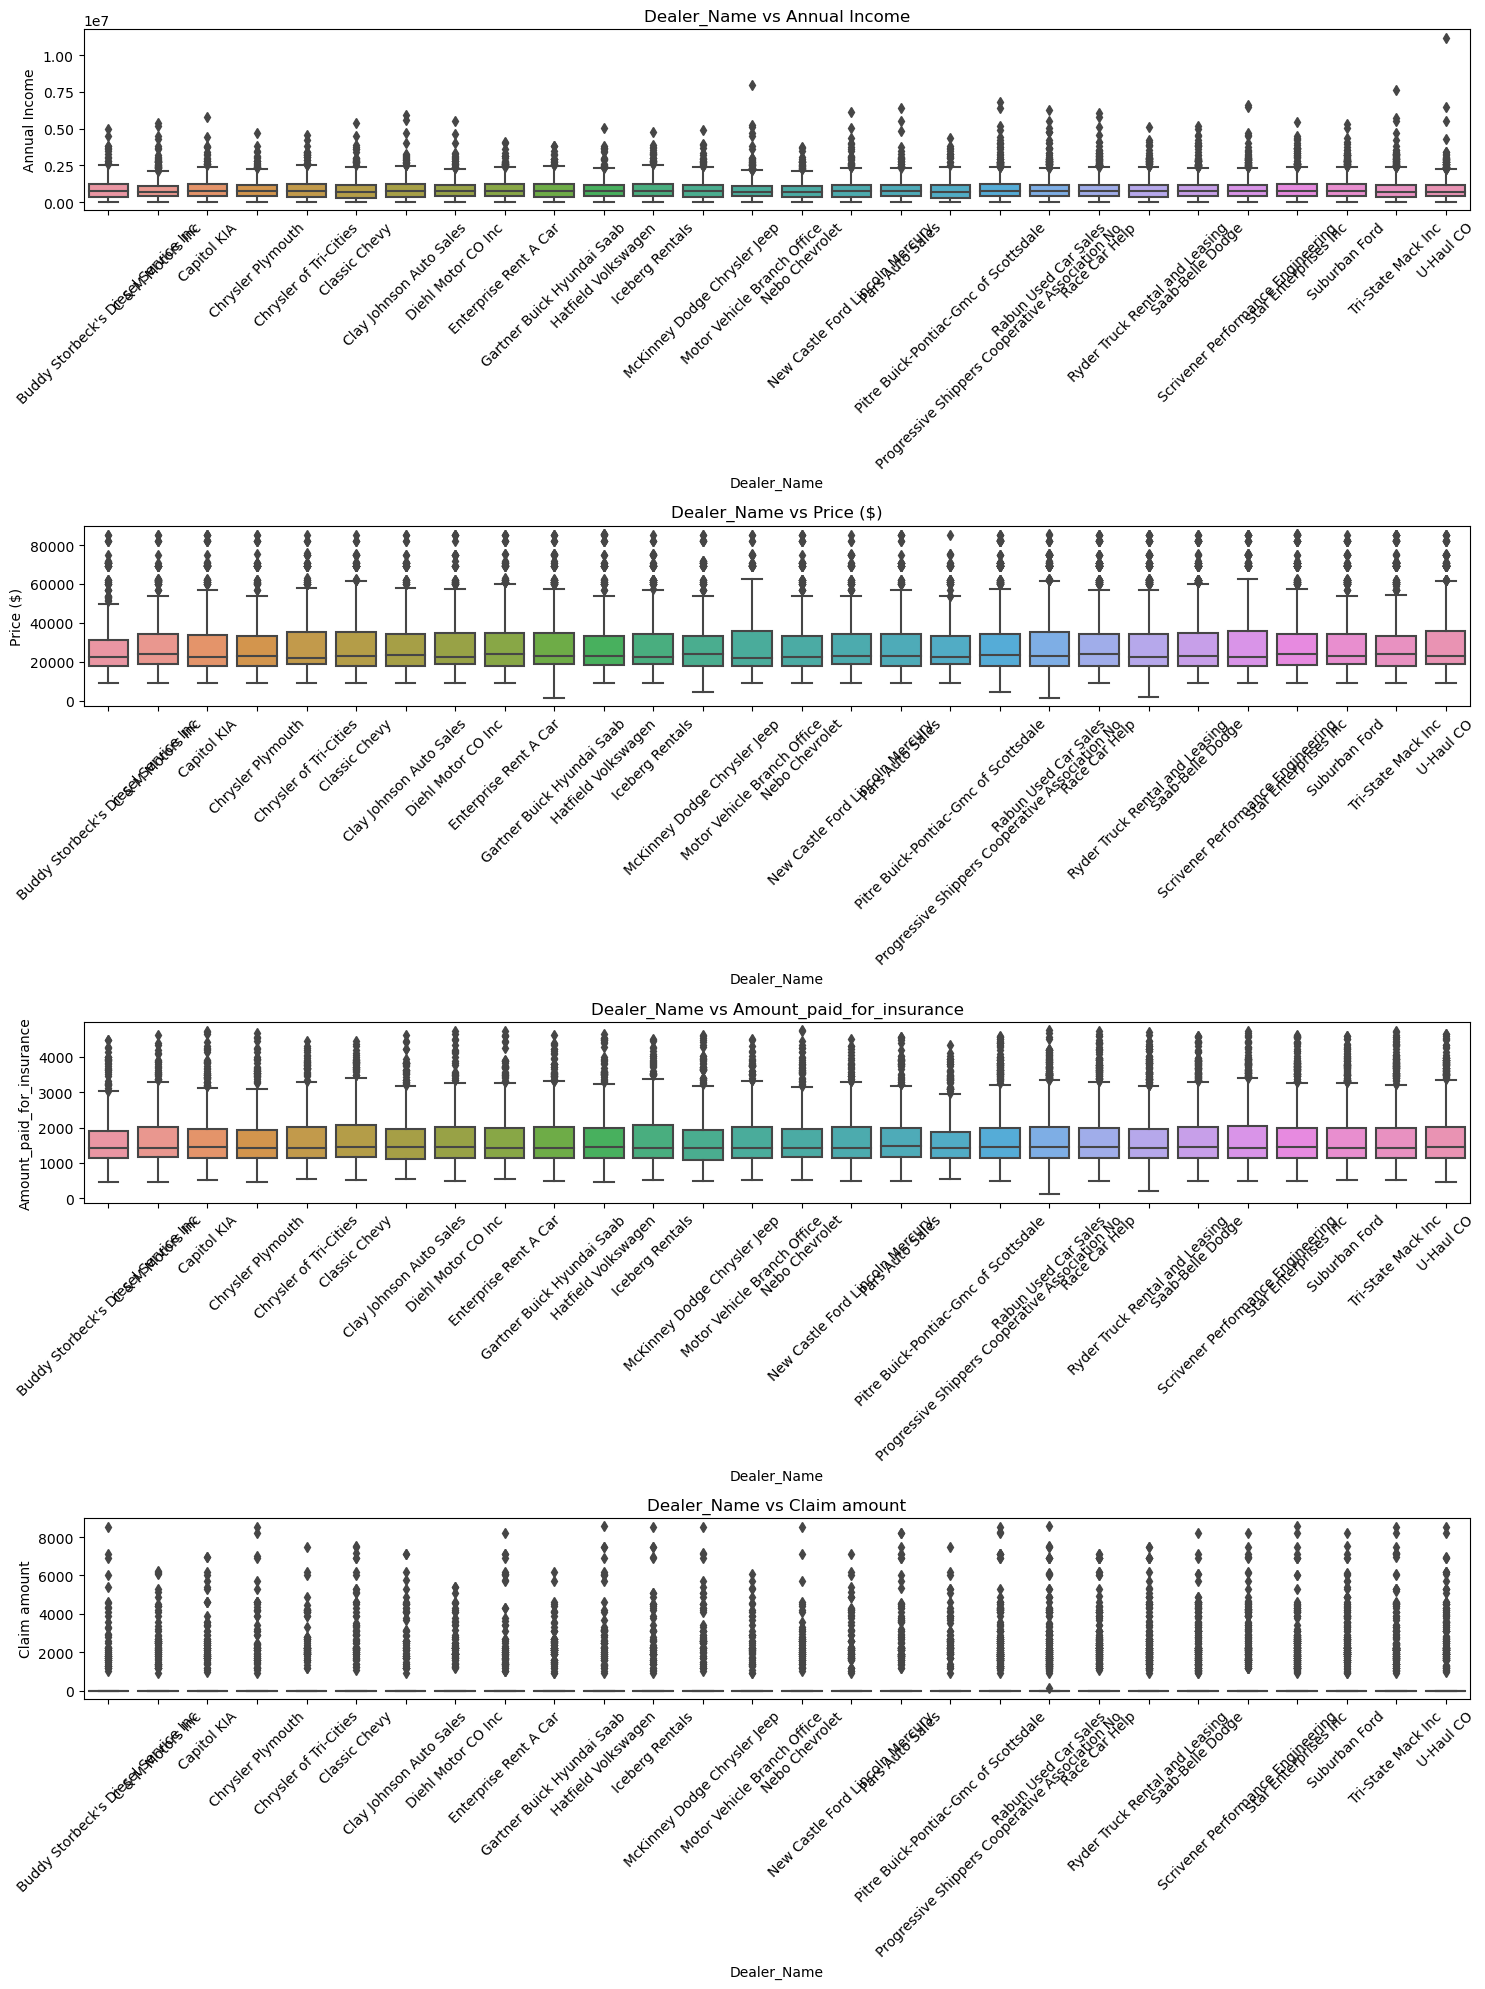

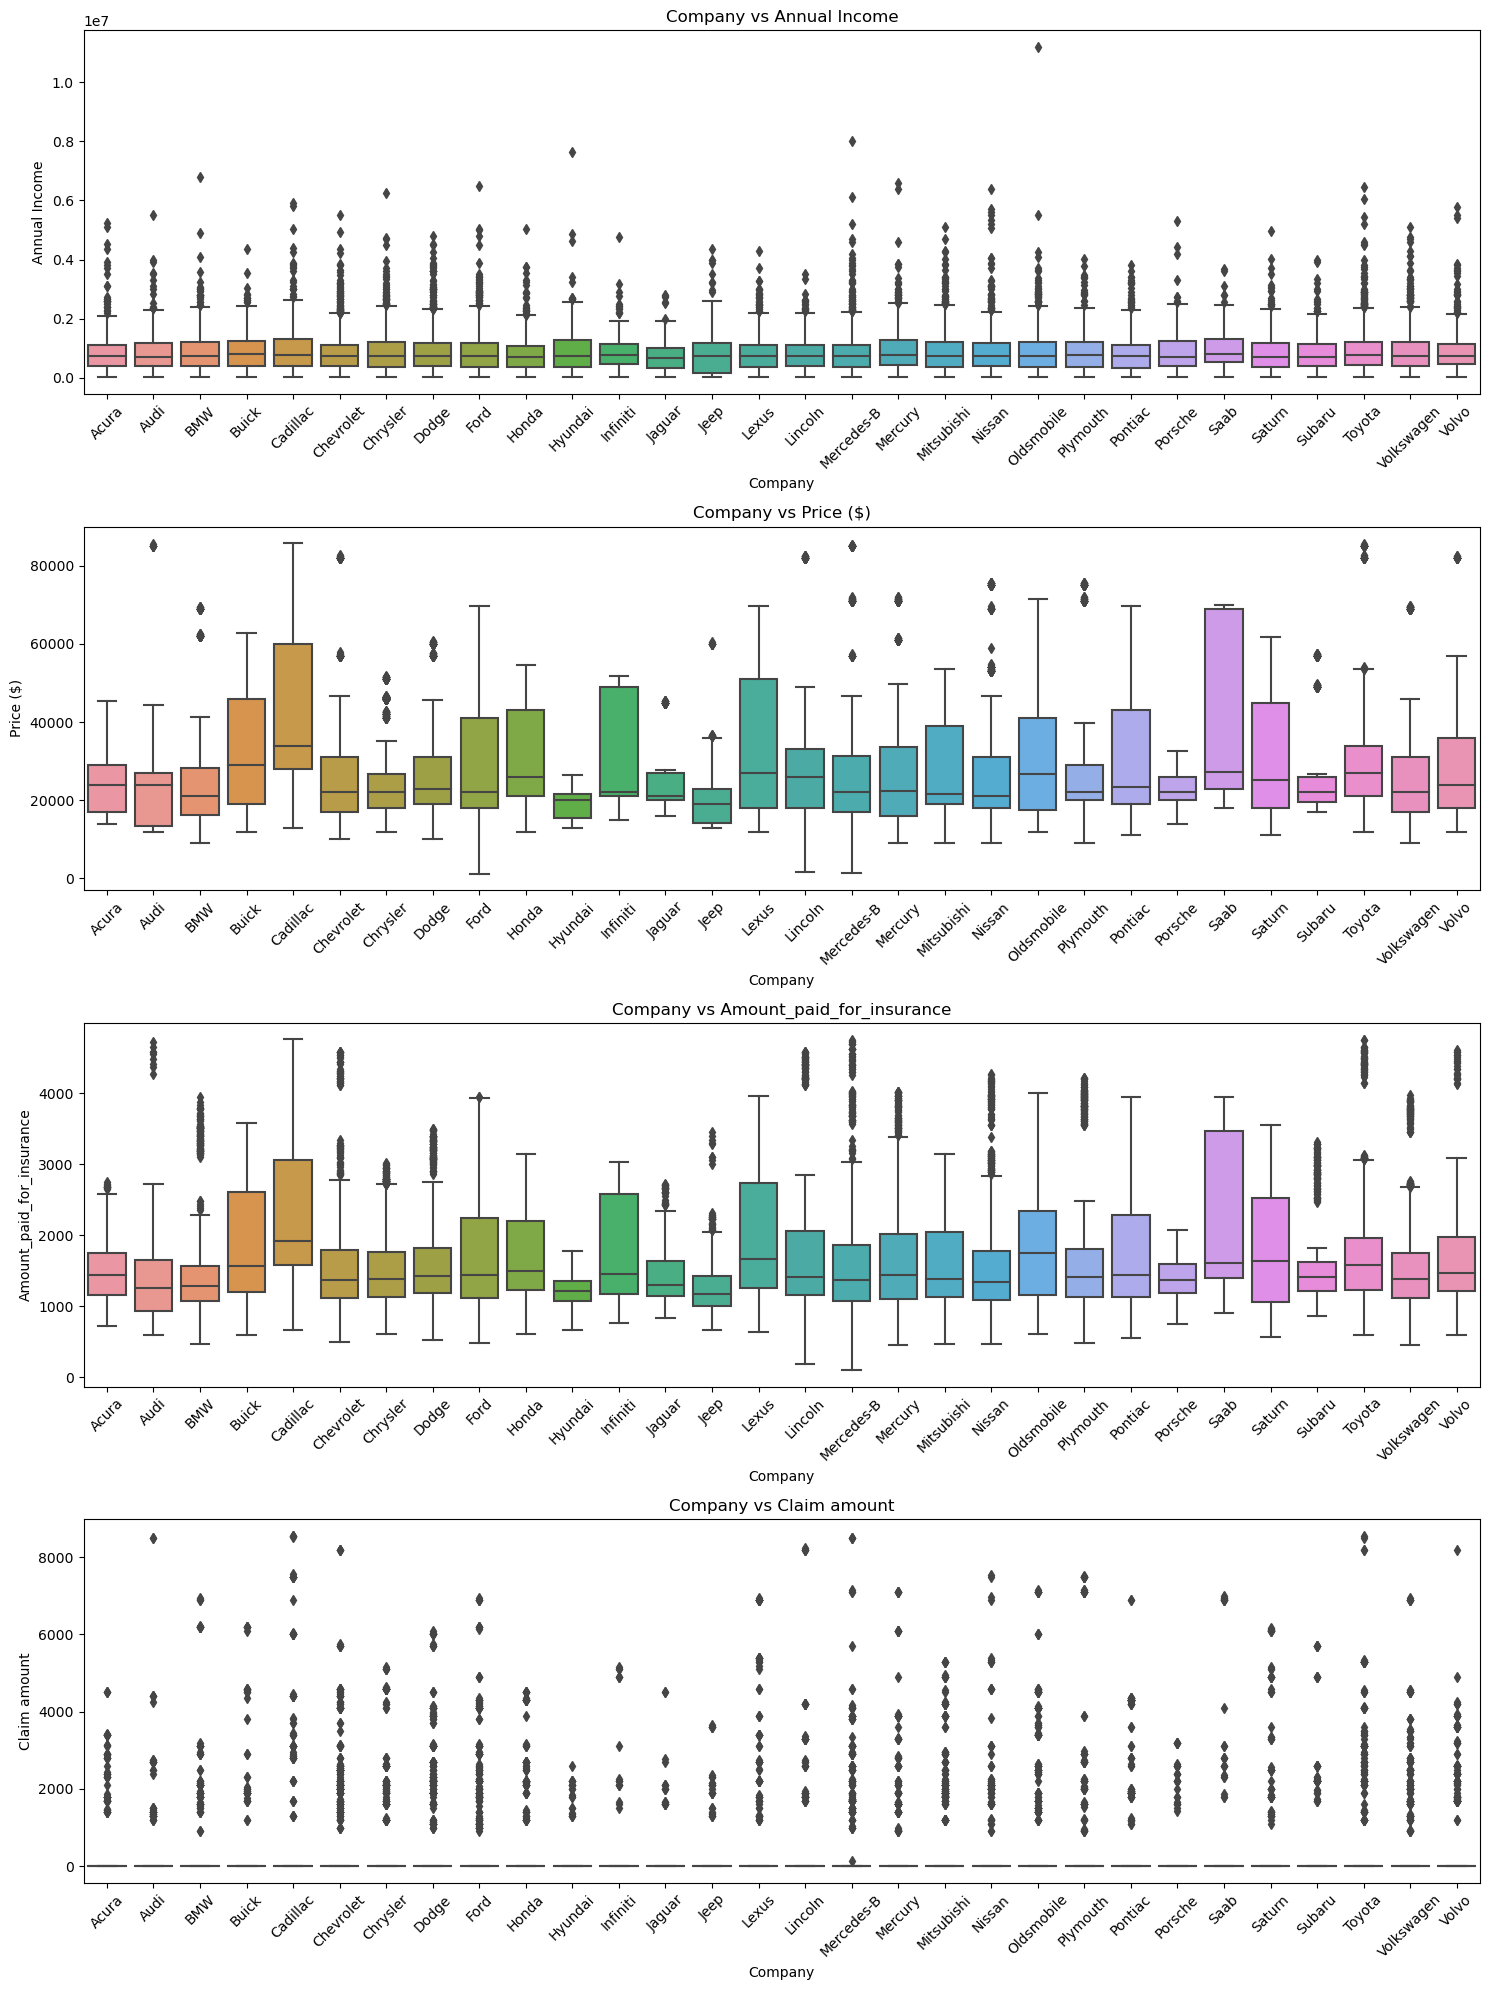

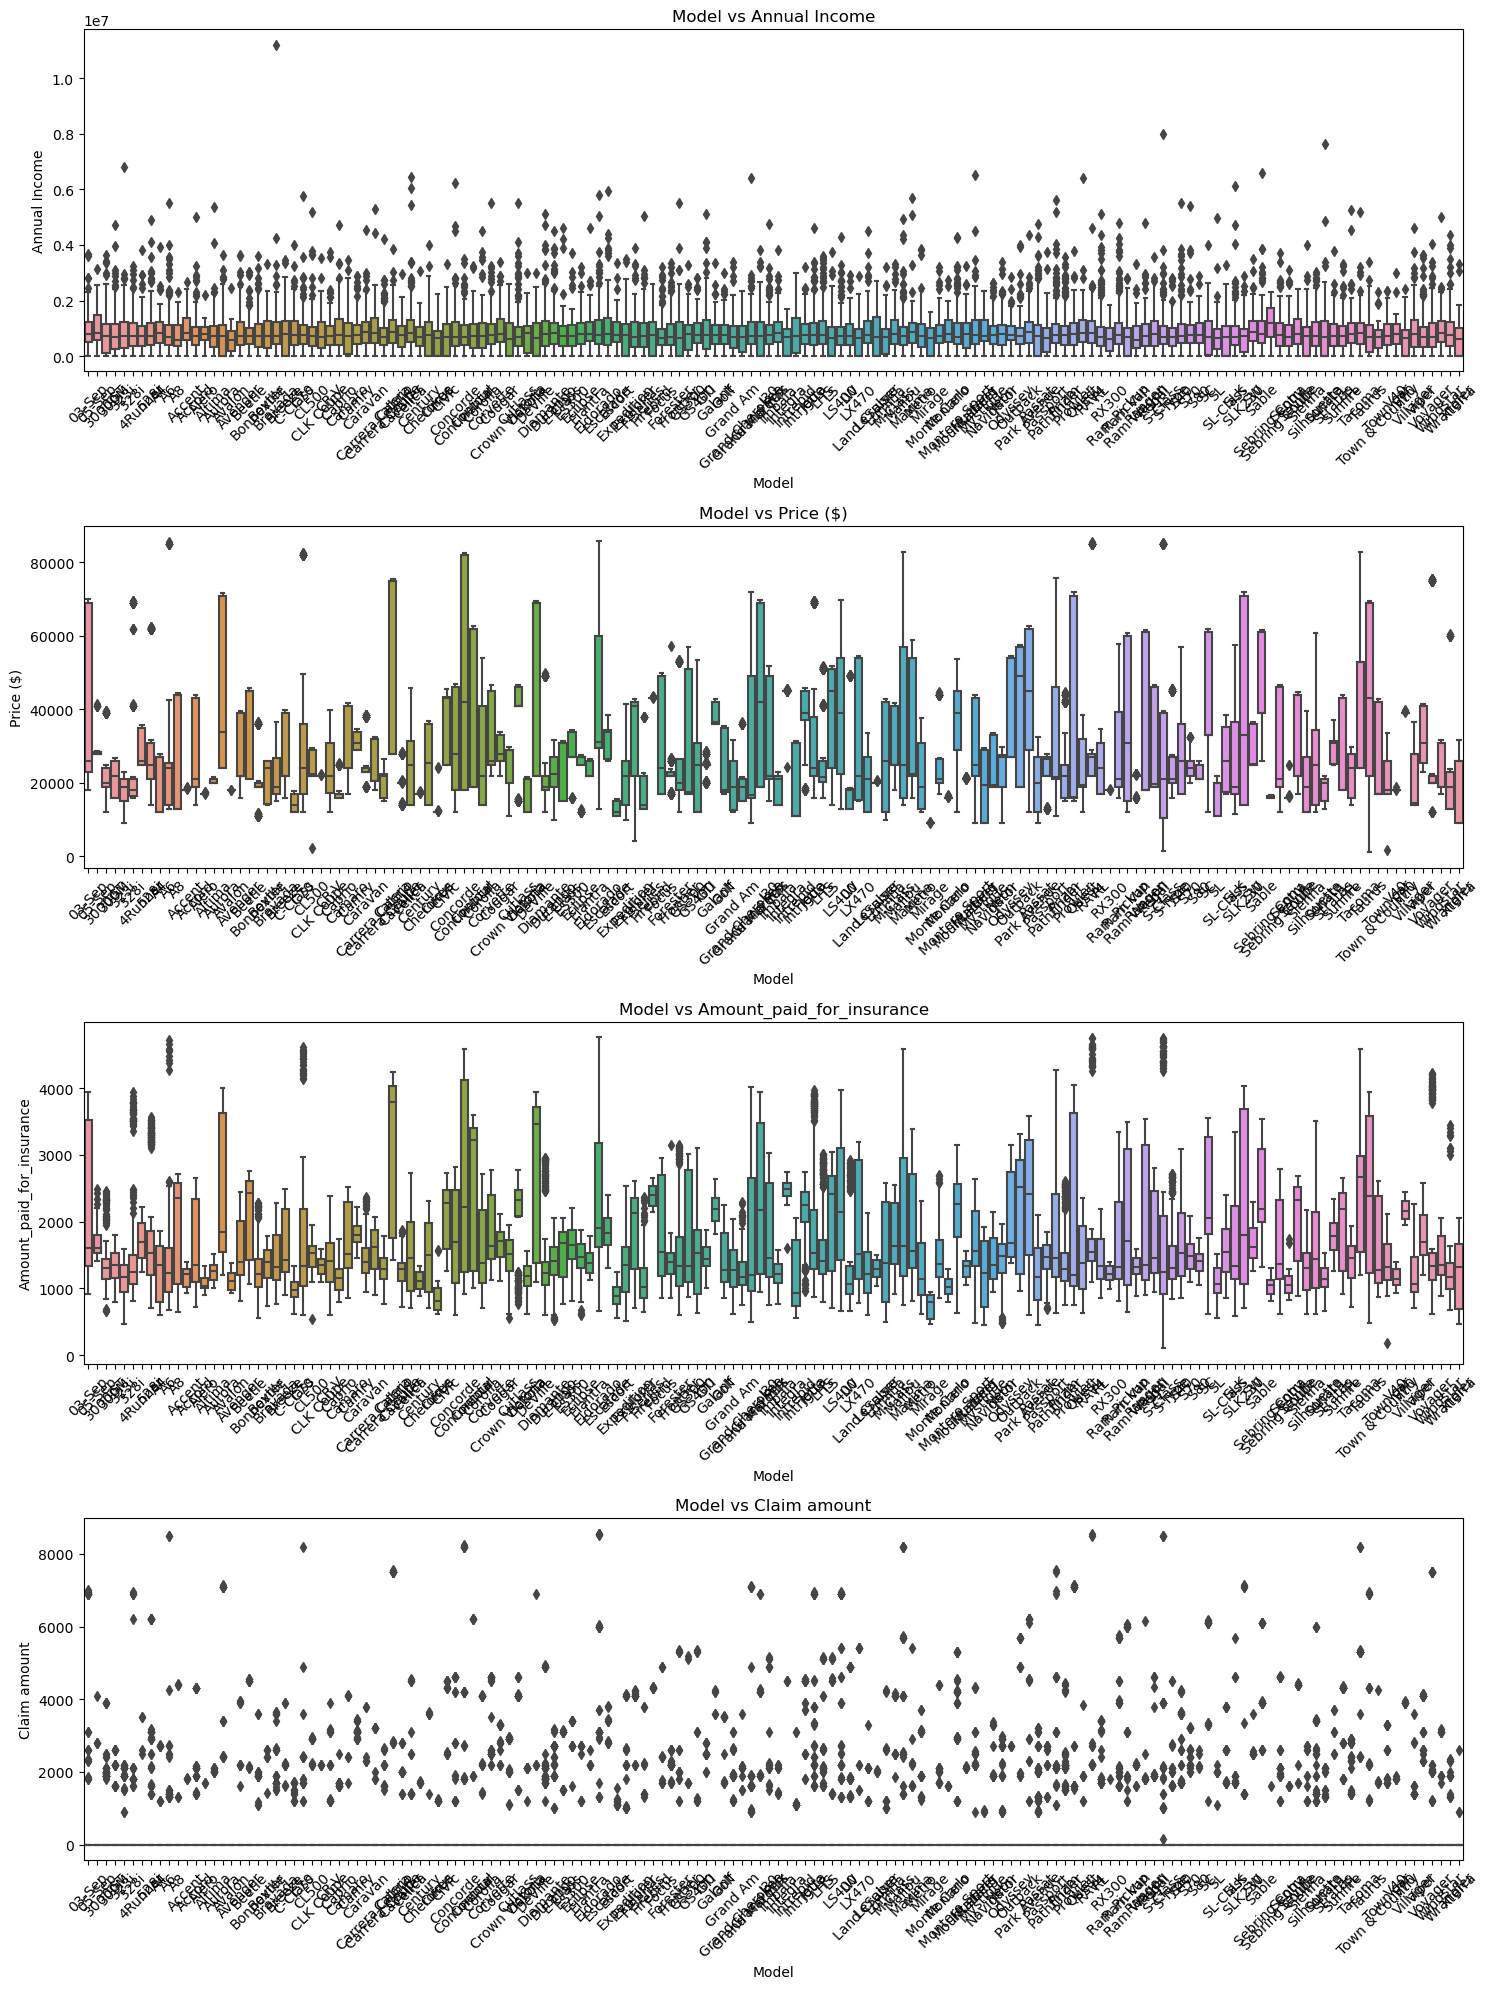

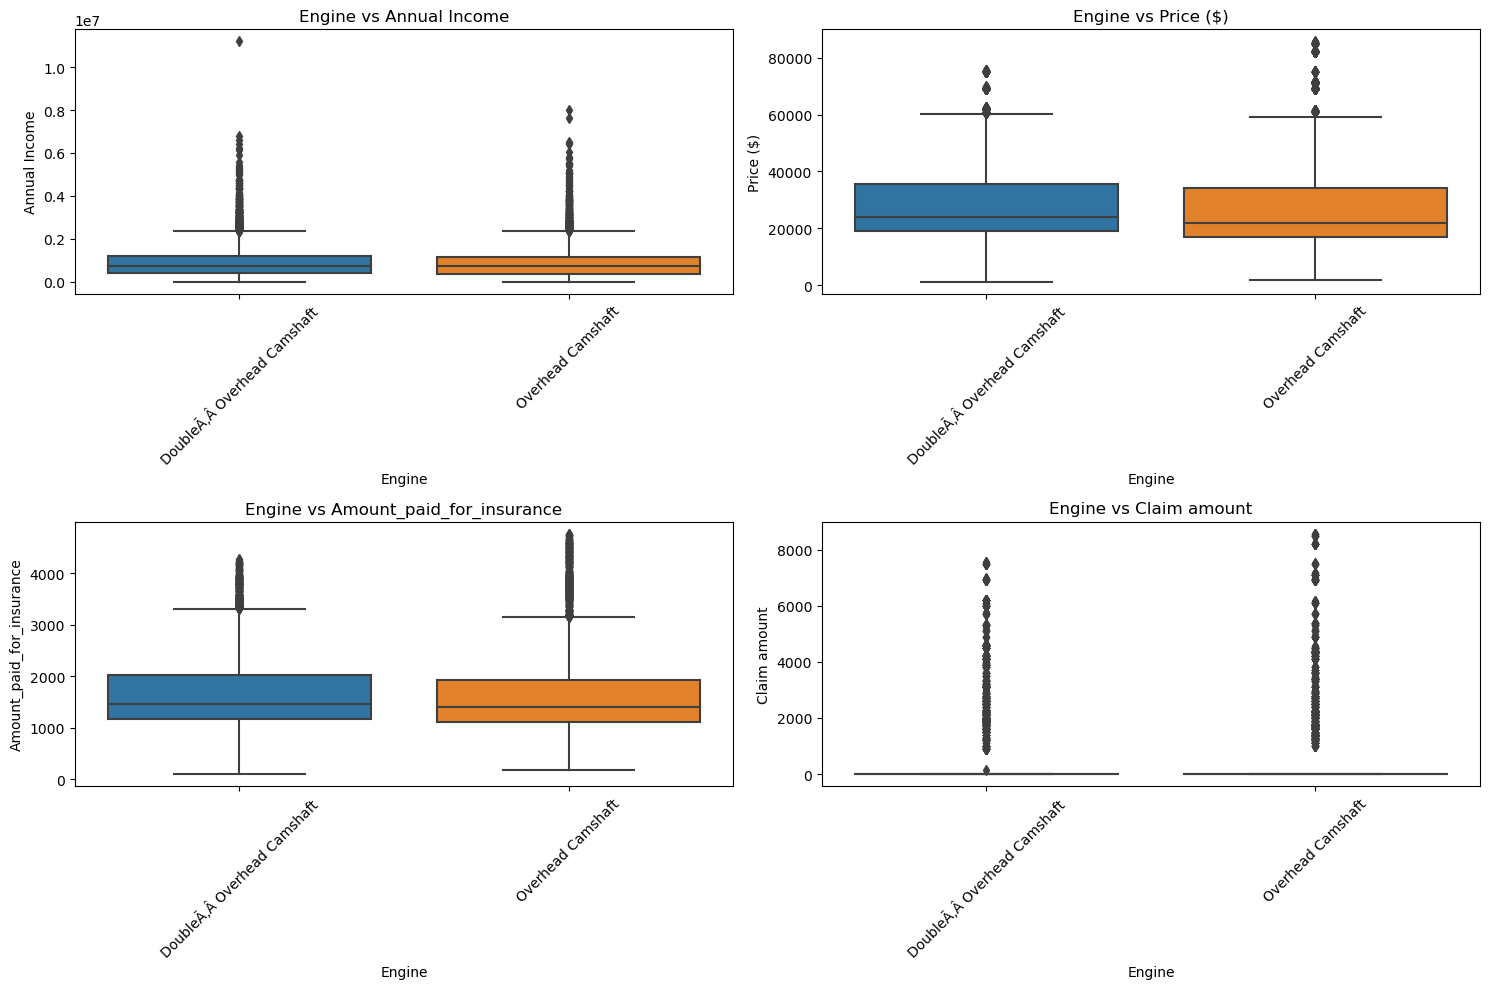

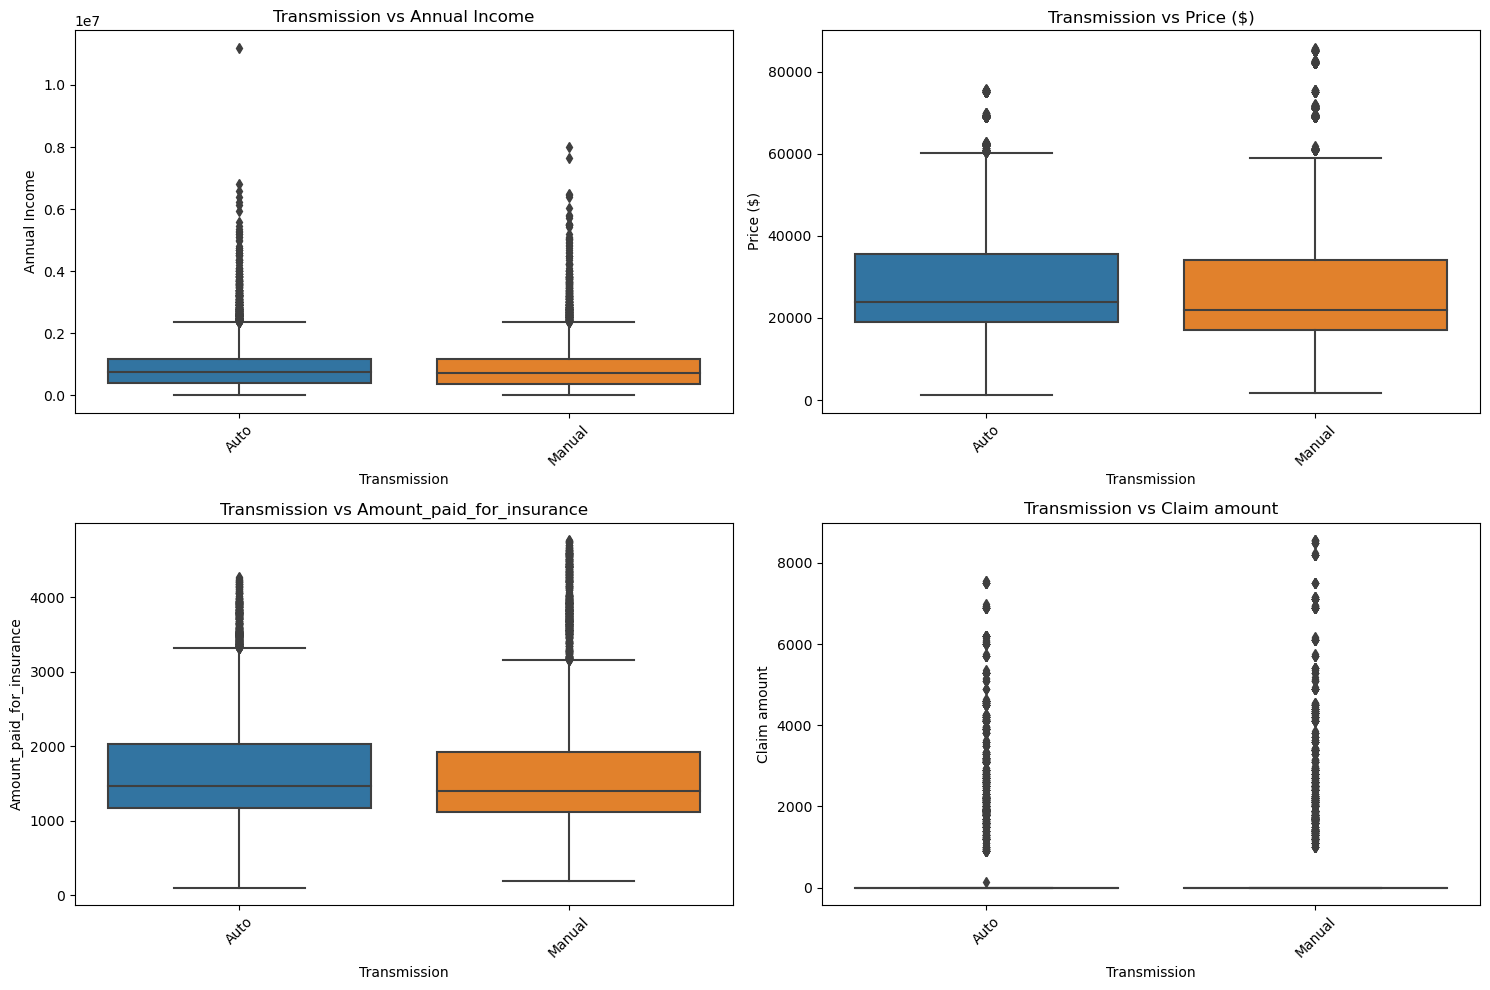

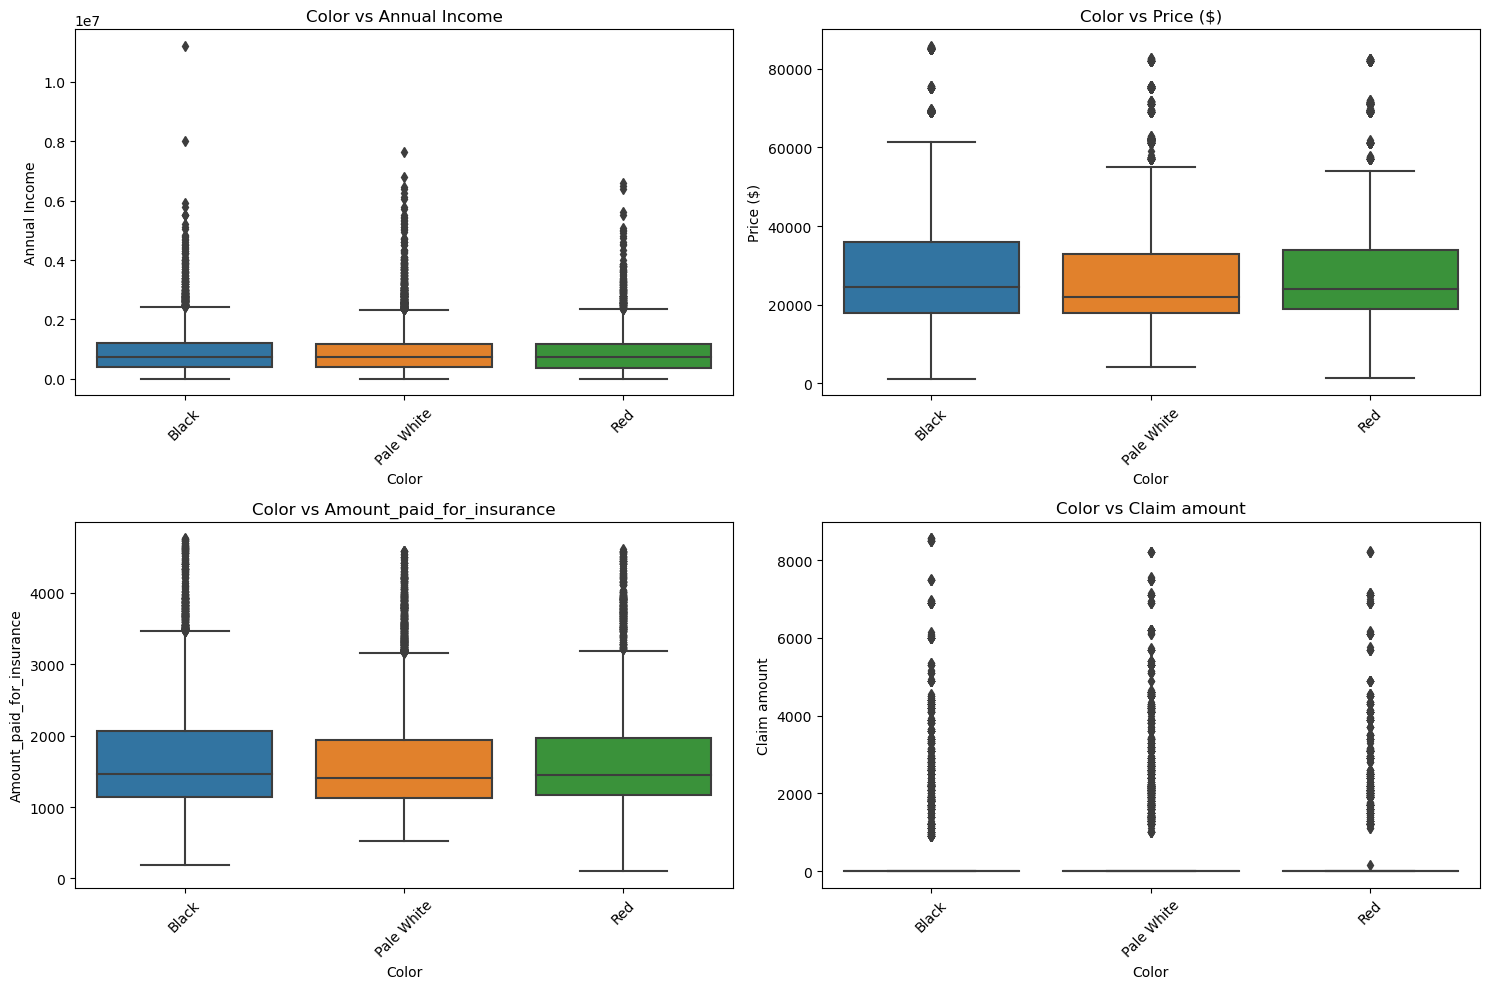

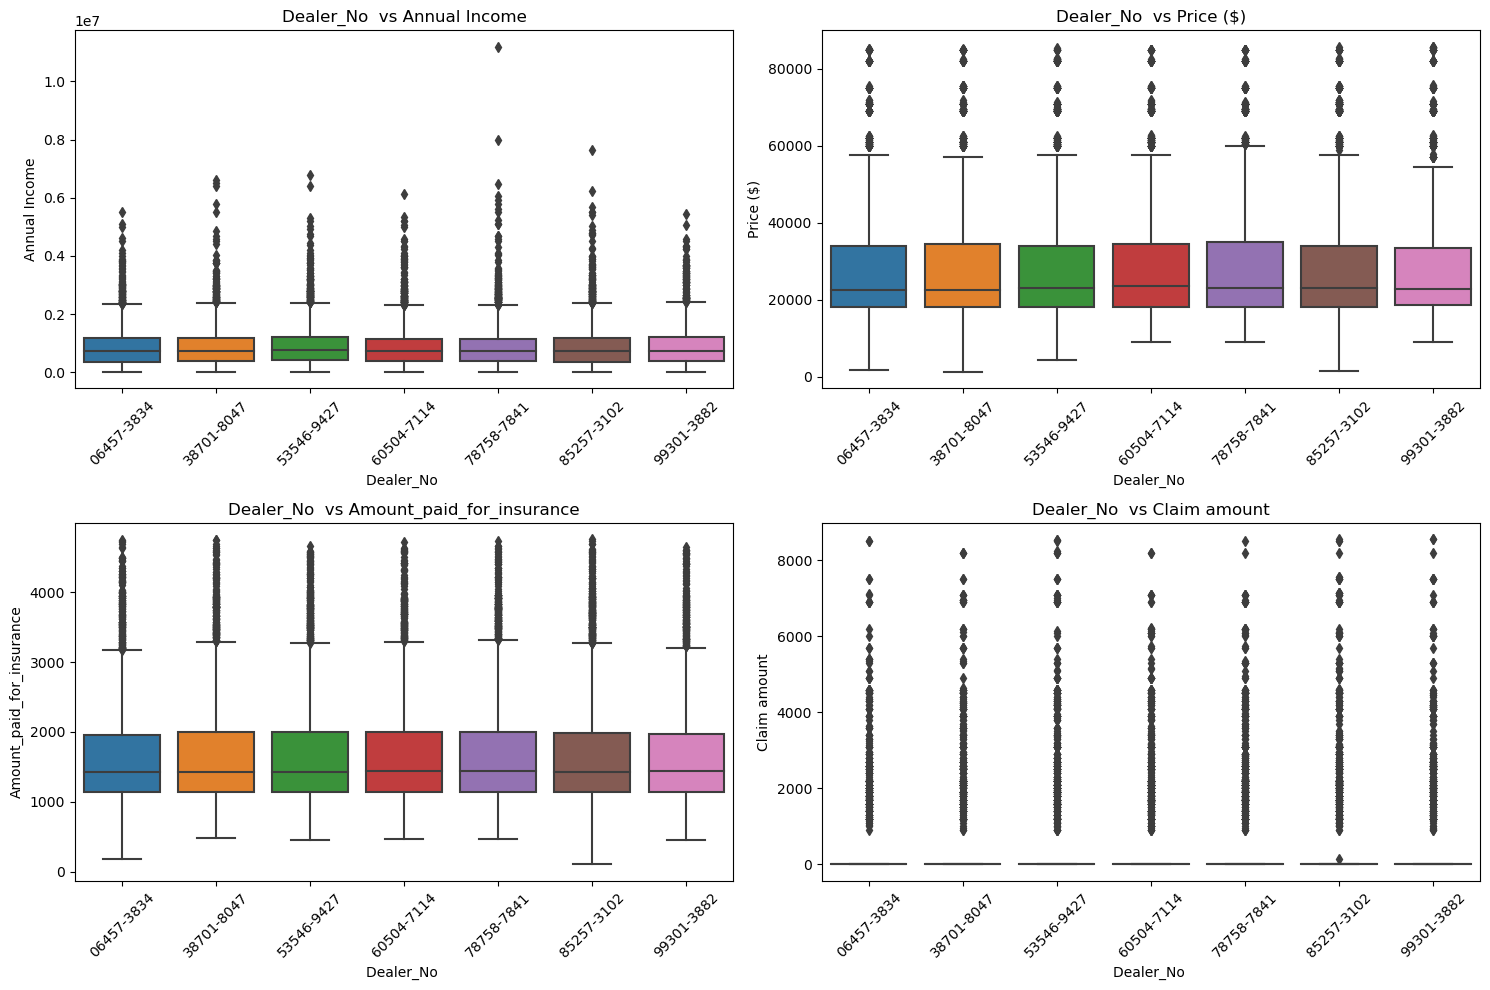

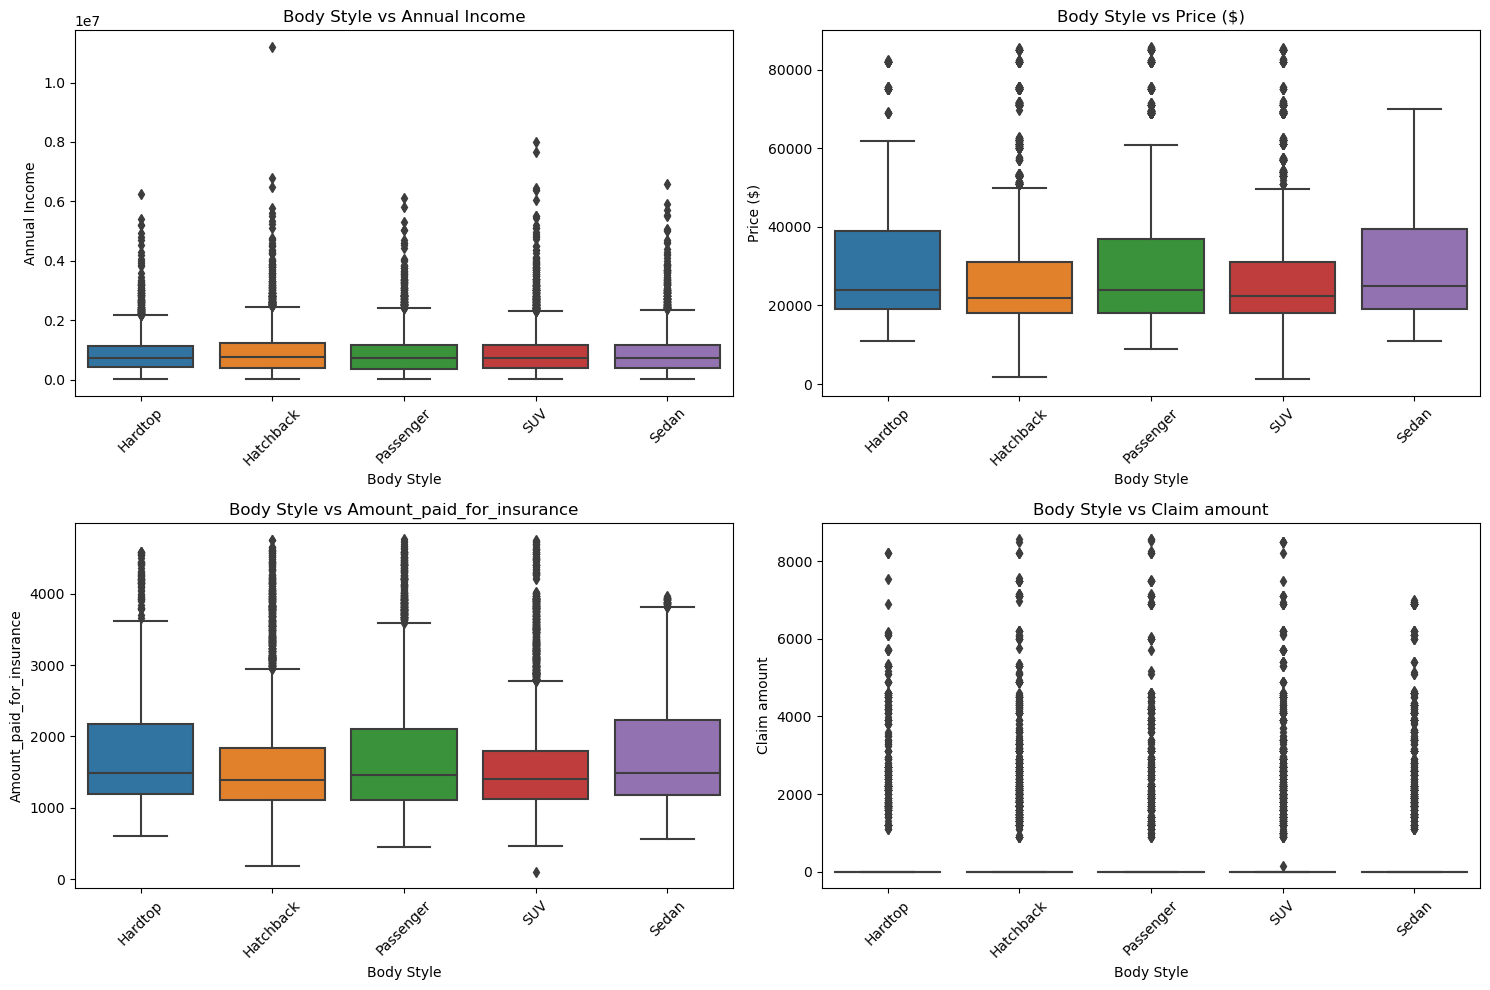

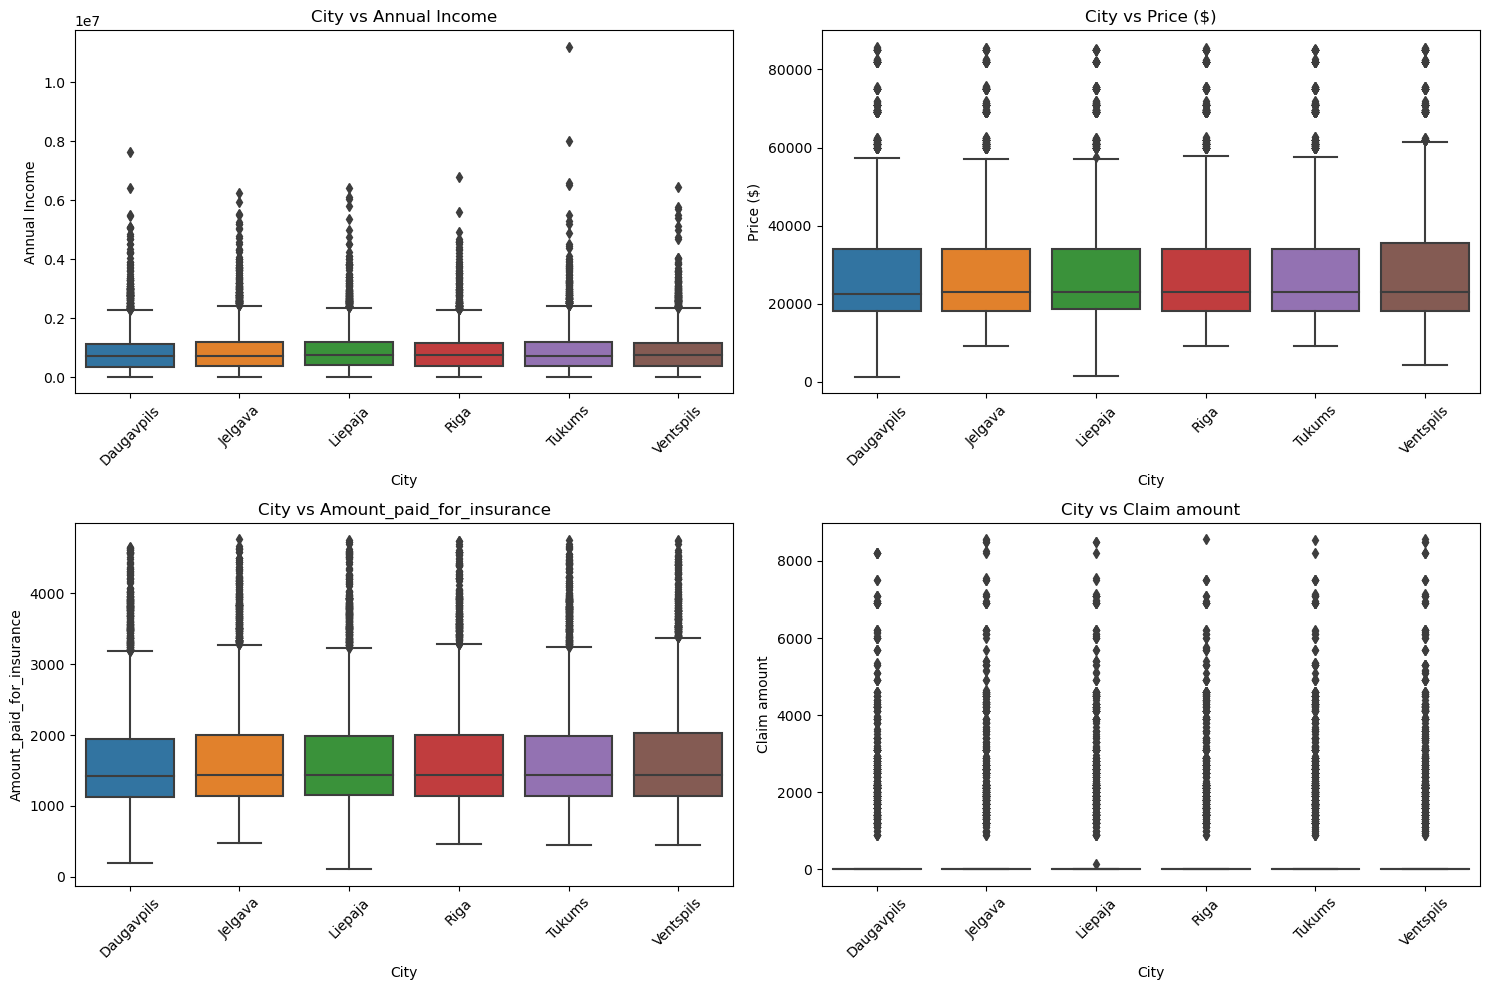

In [101]:
def plot_categorical_vs_numerical(df, cat_columns, max_categories=10):
    """
    Plot each categorical column against all numerical columns in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    cat_columns (list): List of categorical column names in the DataFrame.
    max_categories (int): Maximum number of categories to be displayed in two columns.
    """
    # Identify numerical columns
    num_columns = df.select_dtypes(include=['number']).columns
    
    for cat_col in cat_columns:
        num_plots = len(num_columns)
        num_categories = df[cat_col].nunique()
        
        # Determine the number of columns based on the number of categories
        if num_categories > max_categories:
            num_rows = num_plots
            num_cols = 1
        else:
            num_rows = (num_plots + 1) // 2
            num_cols = 2
        
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
        if num_rows * num_cols == 1:
            axes = [axes]
        else:
            axes = axes.flatten()  # Flatten the axes array for easy iteration
        
        for idx, num_col in enumerate(num_columns):
            sns.boxplot(x=cat_col, y=num_col, data=df, ax=axes[idx])
            axes[idx].set_title(f'{cat_col} vs {num_col}')
            axes[idx].set_xlabel(cat_col)
            axes[idx].set_ylabel(num_col)
            axes[idx].tick_params(axis='x', rotation=45)
        
        # Hide any unused subplots
        for j in range(idx + 1, len(axes)):
            fig.delaxes(axes[j])
        
        plt.tight_layout()
        plt.show()


plot_categorical_vs_numerical(df, cat_columns)


#### Bivariate Insights

#### Gender

1. **Gender vs. Annual Income:**
   -  There is a considerable overlap in the income ranges of males and females.
   -  While both genders have a similar median income, males have a wider range, with some individuals earning exceptionally high incomes (indicated by the outliers).

2. **Gender vs. Price ($):**
   -  This chart suggests a slight difference in prices paid by males and females, with males generally paying slightly more. However, the overlap is substantial, indicating that the price difference isn't very significant.

3. **Gender vs. Amount Paid for Insurance:**
   -  The median amount paid for insurance is very similar between males and females.
   -  However, males show a wider range, with some paying significantly higher amounts for insurance.

4. **Gender vs. Claim Amount:**
   -  The median claim amount is very similar between males and females.
   -  Both genders show a wide range of claim amounts, with some individuals making very high claims. There's a slight indication that males might have a slightly higher upper range in claim amounts.

**Overall:**

The charts reveal some minor differences between genders across various financial metrics, but the overlap in distributions is significant. This suggests that while some slight gender-based trends might exist, they don't necessarily translate to substantial differences in most cases.

**Note:**

The presence of numerous outliers (especially in income, insurance amount, and claim amount) indicates the data is heavily skewed. The median value is likely a more reliable indicator of central tendency than the mean in this scenario.


#### Dealer Name

**1. Dealer Name vs. Annual Income:**
- There's significant variation in annual income among customers across different dealerships.
- Some dealerships, like Buddy St, cater to customers with higher incomes, while others, like U-Haul Co., serve customers with lower incomes.
- The wide range of values within each dealership suggests diverse customer demographics in terms of income levels.

**2. Dealer Name vs. Price ($):**
- The prices of vehicles vary significantly across dealerships.
- Luxury car dealerships, such as Mercedes-Benz of McKinney and Porsche of North Houston, generally have higher prices compared to dealerships selling more affordable brands.
- The variation within each dealership suggests a range of vehicle models and options available at different price points.

**3. Dealer Name vs. Amount_paid_for_insurance:**
- The amount paid for insurance also varies across dealerships.
- Dealerships with higher-priced vehicles generally have customers paying more for insurance.
- The variation within each dealership could be due to factors like the type of coverage chosen, customer age, driving history, and location.

**4. Dealer Name vs. Claim Amount:**
- The claim amount shows a wide range across dealerships.
- Some dealerships have customers with very high claim amounts, while others have relatively low claims.
- This could be influenced by factors like the types of vehicles sold, driving conditions in the area, and customer driving habits.

**Overall:**
- The charts reveal significant differences in financial aspects (income, price, insurance, and claim amount) among customers across various car dealerships.
- This suggests that different dealerships cater to different customer segments with varying financial profiles.
- Dealerships can use this information to tailor their marketing strategies, inventory choices, and financing options to better serve their target customers.
- The wide range of values within each dealership highlights the importance of understanding individual customer needs and preferences.
- These insights could be valuable for dealerships in making informed decisions about pricing, insurance offerings, and customer service strategies.


#### Company

**1. Company vs. Annual Income:**
- There's significant variation in annual income among customers across different car companies.
- Luxury car companies, like Porsche and Mercedes, cater to customers with higher incomes, while others, like Hyundai and Kia, serve customers with lower to moderate incomes.
- The wide range of values within each company suggests diverse customer demographics in terms of income levels.

**2. Company vs. Price ($):**
- The prices of vehicles vary significantly across companies.
- Luxury car companies generally have higher prices compared to companies selling more affordable brands.
- The variation within each company suggests a range of vehicle models and options available at different price points.

**3. Company vs. Amount Paid for Insurance:**
- The amount paid for insurance also varies across companies.
- Companies with higher-priced vehicles generally have customers paying more for insurance.
- The variation within each company could be due to factors like the type of coverage chosen, customer age, driving history, and location.

**4. Company vs. Claim Amount:**
- The claim amount shows a wide range across companies, with some companies having customers with very high claim amounts, while others have relatively low claims.
- This could be influenced by factors like the types of vehicles sold, driving conditions in the area, and customer driving habits.

**Overall:**
- The charts reveal significant differences in financial aspects (income, price, insurance, and claim amount) among customers across various car companies.
- This suggests that different companies cater to different customer segments with varying financial profiles.
- Car companies can use this information to tailor their marketing strategies, inventory choices, and financing options to better serve their target customers.
- The wide range of values within each company highlights the importance of understanding individual customer needs and preferences.
- These insights could be valuable for car companies in making informed decisions about pricing, insurance offerings, and customer service strategies.


#### Model

**1. Model vs. Annual Income:**
- There's a wide range of annual incomes among customers across different car models.
- Some models cater to customers with very high incomes, while others cater to those with lower incomes.
- The wide range of incomes for some models indicates diverse customer demographics.
- However, most models seem to attract customers with annual incomes between $20,000 to $80,000.

**2. Model vs. Price ($):**
- The prices of vehicles vary significantly across models.
- Luxury car models generally have higher prices compared to more affordable models.
- Some models, like the Mercedes-Benz S-Class, show a wide range of prices, indicating different trim levels and options.
- Other models have a narrower price range, suggesting less variability in features and specifications.

**3. Model vs. Amount Paid for Insurance:**
- The amount paid for insurance also varies across models.
- Models with higher prices generally have customers paying more for insurance.
- There's considerable variation in insurance costs within each model, likely due to factors like coverage levels, driver demographics, and location.

**4. Model vs. Claim Amount:**
- The claim amount shows a wide range across models.
- Some models have customers with very high claim amounts, while others have relatively low claims.
- This could be influenced by factors like the types of vehicles, driving conditions in the area, and customer driving habits.

**Overall:**
- The charts reveal significant differences in financial aspects (income, price, insurance, and claim amount) among customers across various car models.
- This suggests that different car models cater to different customer segments with varying financial profiles.
- Car manufacturers can use this information to tailor their marketing strategies, pricing, and insurance offerings to better serve their target customers.
- The wide range of values within each model highlights the importance of understanding individual customer needs and preferences.
- These insights could be valuable for car manufacturers and insurance companies in making informed decisions about pricing, insurance premiums, and risk assessment.


#### Engine

1. **Engine vs. Annual Income:**
   - Both engine types are associated with a wide range of annual incomes.
   - Overhead Camshaft engines appear to be slightly more prevalent among individuals with higher incomes, but the difference isn't substantial.

2. **Engine vs. Price ($):**
   - Vehicles with Overhead Camshaft engines are generally more expensive than those with Double Overhead Camshaft engines.
   - However, there's significant overlap in prices, indicating that other factors besides engine type also influence the price.

3. **Engine vs. Amount Paid for Insurance:**
   - There's no significant difference in the amount paid for insurance between the two engine types.
   - Both types exhibit a wide range of insurance costs, likely due to factors like coverage level, driver's profile, location, and vehicle value.

4. **Engine vs. Claim Amount:**
   - Both engine types show a wide range of claim amounts, with some very high claims in both categories.
   - There doesn't appear to be a significant difference in the central tendency or spread of claim amounts between the two engine types.

**Overall:**
- While there are some minor differences between the two engine types regarding price and the distribution of customer incomes, the overall impact on insurance costs and claim amounts appears to be negligible.
- Other factors besides engine type play a significant role in determining insurance costs and claim amounts.
- The data suggests that engine type alone isn't a major determinant of financial outcomes related to car ownership.
- It's crucial to consider other factors like driving behavior, vehicle value, location, and insurance coverage when assessing potential costs and risks.


#### Transmission

1. **Transmission vs. Annual Income:**
   - Both automatic and manual transmission car owners exhibit a wide range of annual incomes.
   - There is significant overlap in the income distributions, suggesting that income isn't a major differentiating factor between the two groups.
   - However, the median income for automatic transmission owners is slightly higher than that of manual transmission owners.

2. **Transmission vs. Price ($):**
   - Automatic transmission cars are generally more expensive than manual transmission cars.
   - The median price for automatic cars is notably higher, and the distribution is wider, indicating a greater variety of prices.
   - However, there's still some overlap, with some manual transmission cars priced similarly to lower-priced automatic cars.

3. **Transmission vs. Amount Paid for Insurance:**
   - Automatic transmission car owners typically pay slightly more for insurance compared to manual transmission owners.
   - The difference in medians isn't substantial, but it's noticeable.
   - Both groups have a wide range of insurance costs, likely due to factors like coverage, location, and driver profile.

4. **Transmission vs. Claim Amount:**
   - Both transmission types exhibit a wide range of claim amounts, with some very high claims in both categories.
   - There doesn't appear to be a significant difference in the median or overall distribution of claim amounts between automatic and manual transmissions.

**Overall:**
- Automatic transmission cars are generally associated with slightly higher incomes, higher prices, and slightly higher insurance costs.
- However, the differences aren't substantial, and there's significant overlap in all financial aspects between the two transmission types.
- Other factors besides transmission likely play a more significant role in determining income, price, insurance costs, and claim amounts.
- The data suggests that transmission type alone isn't a major determinant of financial outcomes related to car ownership.


#### Color

1. **Color vs. Annual Income:**
   -  There is significant overlap in the annual income range across all three car colors.
   -  Black cars show the most comprehensive range of incomes, indicating they are purchased by people with very diverse financial backgrounds.
   -  The median income of black car owners seems to be slightly higher than that of pale white and red car owners.

2. **Color vs. Price ($):**
   -  Black cars are generally more expensive than pale white and red cars.
   -  The price distribution for black cars is also wider, suggesting a broader range of models and options available.
   -  Red cars seem to be the most affordable, with a tighter price range.

3. **Color vs. Amount paid for insurance:**
   -  Black cars tend to have slightly higher insurance costs than pale white and red cars.
   -  The differences in median insurance costs are not substantial, but they are noticeable.
   -  All three colors show a wide range of insurance costs, likely due to factors beyond color, such as car model, coverage level, driver's profile, and location.

4. **Color vs. Claim amount:**
   -  All three colors exhibit a wide range of claim amounts, with many outliers.
   -  There does not seem to be a significant difference in the median or overall distribution of claim amounts between the three colors.
   -  This suggests that car color does not have a major impact on the likelihood or severity of claims.

**Overall:**
- Black cars are associated with slightly higher annual incomes, prices, and insurance costs compared to pale white and red cars.
- However, the differences are not very significant, and all three colors exhibit considerable overlap in all financial aspects.
- The data suggests that car color is not a major determining factor in the financial outcomes related to car ownership. Other factors, such as car model, driver behavior, and location, likely play a more significant role.


#### Dealer No.

**1. Dealer No. vs. Annual Income:**
- There's significant variation in the annual income of customers across different dealerships.
- Some dealerships, like 38701-8047, cater to customers with higher incomes, while others, like 06457-3834, serve customers with a wider range of incomes.
- The wide range of values within each dealership suggests diverse customer demographics in terms of income levels.

**2. Dealer No. vs. Price ($):**
- The prices of vehicles vary significantly across dealerships.
- Some dealerships specialize in luxury cars with higher prices, while others offer more affordable options.
- The variation within each dealership suggests a range of vehicle models and options available at different price points.

**3. Dealer No. vs. Amount_paid_for_insurance:**
- The amount paid for insurance also varies across dealerships.
- Dealerships with higher-priced vehicles generally have customers paying more for insurance.
- The variation within each dealership could be due to factors like the type of coverage chosen, customer age, driving history, and location.

**4. Dealer No. vs. Claim amount:**
- The claim amount shows a wide range across dealerships.
- Some dealerships have customers with very high claim amounts, while others have relatively low claims.
- This could be influenced by factors like the types of vehicles sold, driving conditions in the area, and customer driving habits.

**Overall:**
- The charts reveal significant differences in financial aspects (income, price, insurance, and claim amount) among customers across various car dealerships.
- This suggests that different dealerships cater to different customer segments with varying financial profiles.
- Dealerships can use this information to tailor their marketing strategies, inventory choices, and financing options to better serve their target customers.
- The wide range of values within each dealership highlights the importance of understanding individual customer needs and preferences.
- These insights could be valuable for dealerships in making informed decisions about pricing, insurance offerings, and customer service strategies.


#### Body Style

1. **Body Style vs. Annual Income:**
   -  There is significant overlap in the annual income range across all body styles.
   -  SUV owners tend to have slightly higher median incomes compared to other body styles.
   -  All body styles show a wide range of incomes, suggesting they are purchased by people with diverse financial backgrounds.

2. **Body Style vs. Price ($):**
   -  SUV is generally the most expensive body style, followed by Sedan and Passenger.
   -  Hatchback and Hardtop are the most affordable, with a tighter price range.
   -  The price distribution for SUV is wider, suggesting a broader range of models and options available.

3. **Body Style vs. Amount Paid for Insurance:**
   -  SUV and Sedan owners typically pay slightly more for insurance compared to other body styles.
   -  The differences in median insurance costs are not substantial, but they are noticeable.
   -  All body styles show a wide range of insurance costs, likely due to factors beyond body style, such as car model, coverage level, driver's profile, and location.

4. **Body Style vs. Claim Amount:**
   -  All body styles exhibit a wide range of claim amounts, with some extreme outliers.
   -  There doesn't seem to be a significant difference in the median or overall distribution of claim amounts between body styles.
   -  This suggests that body style alone does not have a major impact on the likelihood or severity of claims.

**Overall:**
- SUVs are generally associated with slightly higher annual incomes, prices, and insurance costs compared to other body styles.
- However, the differences are not very significant, and all body styles exhibit considerable overlap in all financial aspects.
- The data suggests that body style is not a major determining factor in the financial outcomes related to car ownership. Other factors, such as car model, driver behavior, and location, likely play a more significant role.


#### City

**1. City vs. Annual Income:**
- There's a significant variation in the annual income of residents across different cities.
- Riga stands out with the highest median income, followed by Tukums and Jelgava.
- Daugavpils has the lowest median income, but also a wider spread, indicating greater income disparity.
- All cities have outliers, suggesting the presence of high-income earners in each location.

**2. City vs. Price ($):**
- The prices of goods/services vary across cities.
- Riga, being the capital and likely a more expensive city, shows higher prices compared to others.
- The variation within each city suggests a range of options available at different price points.

**3. City vs. Amount Paid for Insurance:**
- The amount paid for insurance is relatively similar across cities, with Riga showing slightly higher values.
- This could be attributed to higher property values or a greater risk perception in the capital.

**4. City vs. Claim Amount:**
- The claim amount shows a wide range across cities, with Riga and Daugavpils having the highest medians.
- This could be due to various factors such as higher population density, traffic congestion, or different types of insurance claims prevalent in these cities.

**Overall:**
- The charts reveal differences in financial aspects (income, prices, insurance, and claim amounts) across Latvian cities.
- Riga, as the capital, generally shows higher values in most aspects, reflecting its economic status.
- The data suggests that the choice of city can significantly impact financial aspects of living, primarily due to variations in income and cost of living.
- Individuals and businesses can use this information to make informed decisions about relocation, pricing strategies, and insurance coverage.


### Bivariate conclusions:
The image presents a series of box plots analyzing the relationship between various car attributes (gender, dealership, company, model, engine type, transmission, color, dealer number, and body style) and financial aspects (annual income, price, insurance cost, and claim amount).

The analysis consistently reveals that while some minor differences exist between categories within each attribute (e.g., males vs. females, different car models, etc.), the overall distributions largely overlap. This suggests that these attributes are not the primary determinants of financial outcomes related to car ownership.

For instance, while SUV owners might have a slightly higher median income than other body styles, there's a wide range of incomes across all body styles. Similarly, automatic transmission cars might be slightly more expensive and have slightly higher insurance costs, but these differences are not substantial compared to the overall variation within each transmission type.

The data emphasizes that factors like personal financial circumstances, individual choices (e.g., coverage level, car model), and external factors (e.g., location, driving behavior) likely play a more significant role in determining car prices, insurance costs, and claim amounts.

In conclusion, the box plots highlight that while some trends might exist between car attributes and financial aspects, they do not translate to major disparities. The data suggests a complex interplay of various factors influencing car-related financial outcomes, with car attributes being just one piece of the puzzle.


In [102]:
# Group by 'Company' and 'Model' and calculate some metric (e.g., count) for each box within the treemap
company_model_counts = df.groupby(['Company', 'Model']).size().reset_index(name='Count')

# Create a treemap visualization
fig = px.treemap(company_model_counts, path=['Company', 'Model'], values='Count',
                 title='Company and Model Distribution',
                 width=1000, height=800)
fig.show()

### Talking about CLaim amount
Lets discuss about the Claim amount over time:

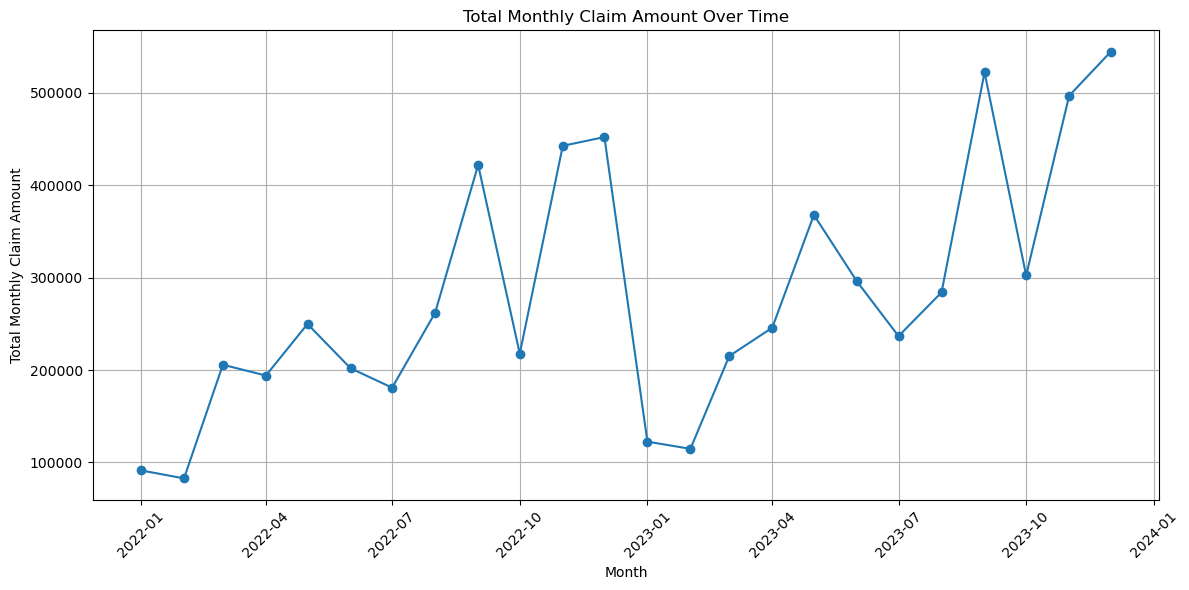

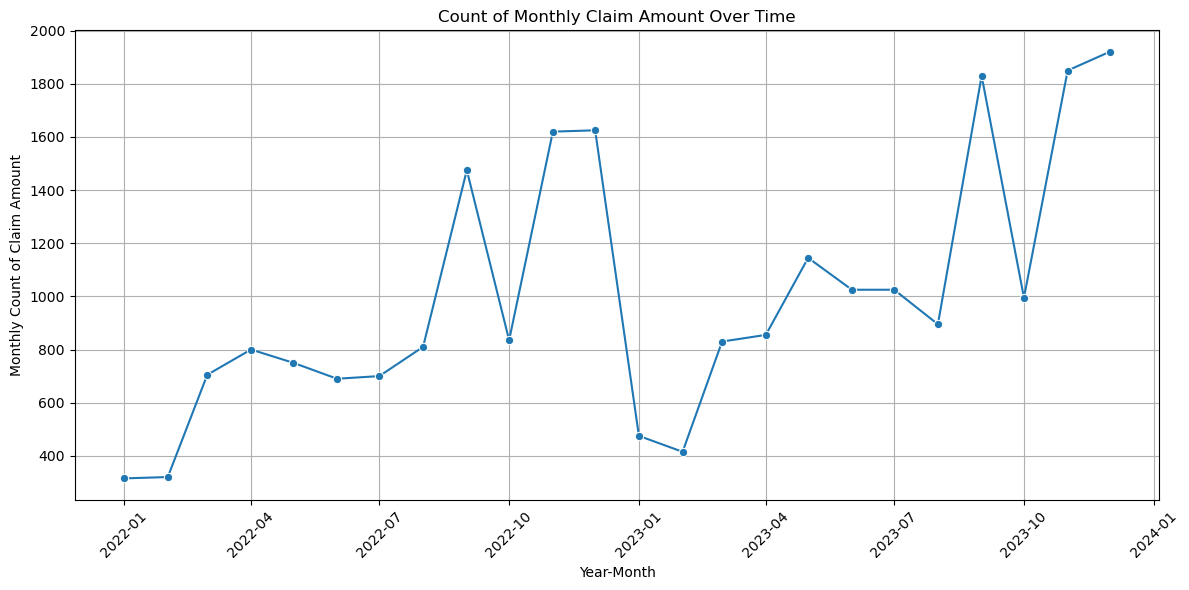

In [49]:
# Extract month and year from the 'Date' column
df['YearMonth'] = df['Date'].dt.to_period('M')

# Group by 'YearMonth' and calculate the total 'Claim amount' and count of claims for each month
monthly_claims = df.groupby('YearMonth').agg({'Claim amount': ['sum', 'count']}).reset_index()
monthly_claims.columns = ['YearMonth', 'Total Claim Amount', 'Claim Count']

# Convert 'YearMonth' back to datetime for plotting
monthly_claims['YearMonth'] = monthly_claims['YearMonth'].dt.to_timestamp()

# Plot total monthly claim amount over time
plt.figure(figsize=(12, 6))
plt.plot(monthly_claims['YearMonth'], monthly_claims['Total Claim Amount'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Monthly Claim Amount')
plt.title('Total Monthly Claim Amount Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot count of monthly claim amounts over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='Claim Count', data=monthly_claims, marker='o')
plt.xlabel('Year-Month')
plt.ylabel('Monthly Count of Claim Amount')
plt.title('Count of Monthly Claim Amount Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Insights from Total Monthly Claim Amount over time:

* **Overall Trend:** The total claim amount has generally increased over time, with some fluctuations.
* **Fluctuations:** There have been significant fluctuations in the claim amount from month to month. For example, there was a sharp increase from July 2022 to October 2022, followed by a sharp decrease in January 2023.
* **Peak and Valley:** The highest claim amount was recorded in January 2024, exceeding 500,000. The lowest point was in April 2022.
* **Recent Trend:** In the latter half of 2023, the claim amount experienced high volatility, fluctuating significantly from month to month.

Possible interpretations:

* **Seasonality:** The fluctuations could be due to seasonal factors. For example, certain types of claims might be more frequent in certain months.
* **External events:** The increases could be due to specific events or circumstances that led to more claims in a given month.
* **Internal factors:** Changes in company policy or claim processing procedures could also contribute to the fluctuations.


Insights from Count of Monthly Claim Amount over time:

* **Overall Trend:** The count of claims has generally increased over time, with some fluctuations.
* **Fluctuations:** There have been significant fluctuations in the claim count from month to month. For example, there was a sharp increase from July 2022 to October 2022, followed by a drop in January 2023.
* **Peak and Valley:** The highest claim count was recorded in January 2024, exceeding 1900. The lowest point was in January 2022.
* **Recent Trend:** In the latter half of 2023, the claim count experienced high volatility, fluctuating significantly from month to month.

Possible interpretations:

* **Seasonality:** The fluctuations could be due to seasonal factors. For example, certain types of claims might be more frequent in certain months.
* **External events:** The increases could be due to specific events or circumstances that led to more claims in a given month.
* **Internal factors:** Changes in company policy or claim processing procedures could also contribute to the fluctuations.



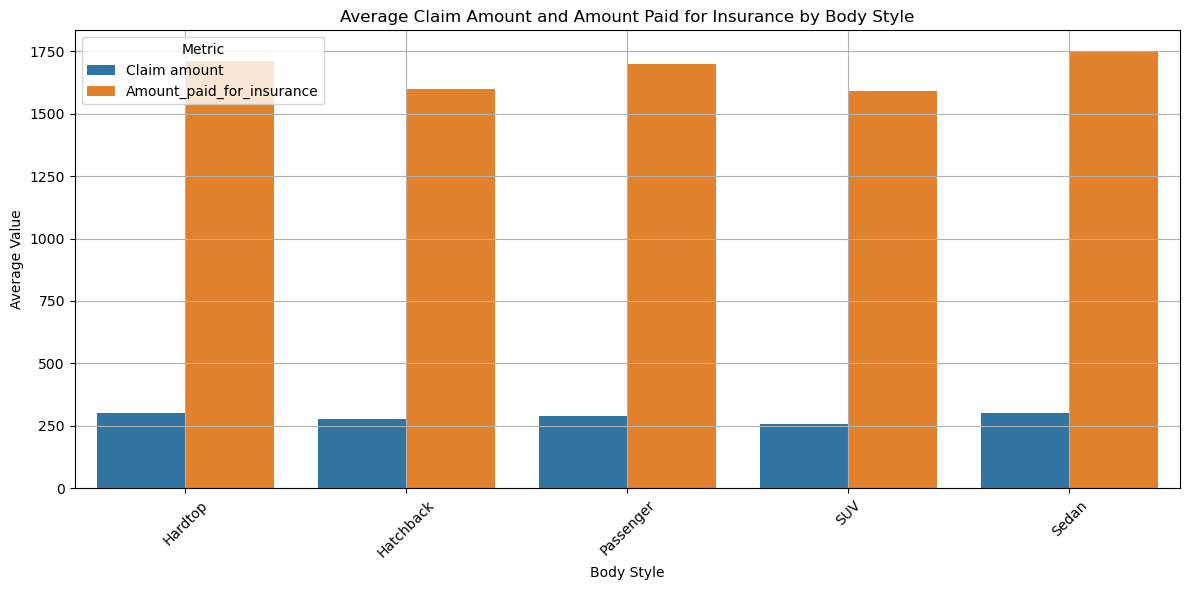

In [54]:

# Group by 'Body Style' and calculate the mean 'Claim amount' and 'Amount_paid_for_insurance'
aggregated_data = df.groupby('Body Style').agg({
    'Claim amount': 'mean',
    'Amount_paid_for_insurance': 'mean'
}).reset_index()

# Reshape the data for plotting
melted_data = aggregated_data.melt(id_vars='Body Style', 
                                   value_vars=['Claim amount', 'Amount_paid_for_insurance'],
                                   var_name='Metric', 
                                   value_name='Value')

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Body Style', y='Value', hue='Metric', data=melted_data)
plt.xlabel('Body Style')
plt.ylabel('Average Value')
plt.title('Average Claim Amount and Amount Paid for Insurance by Body Style')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

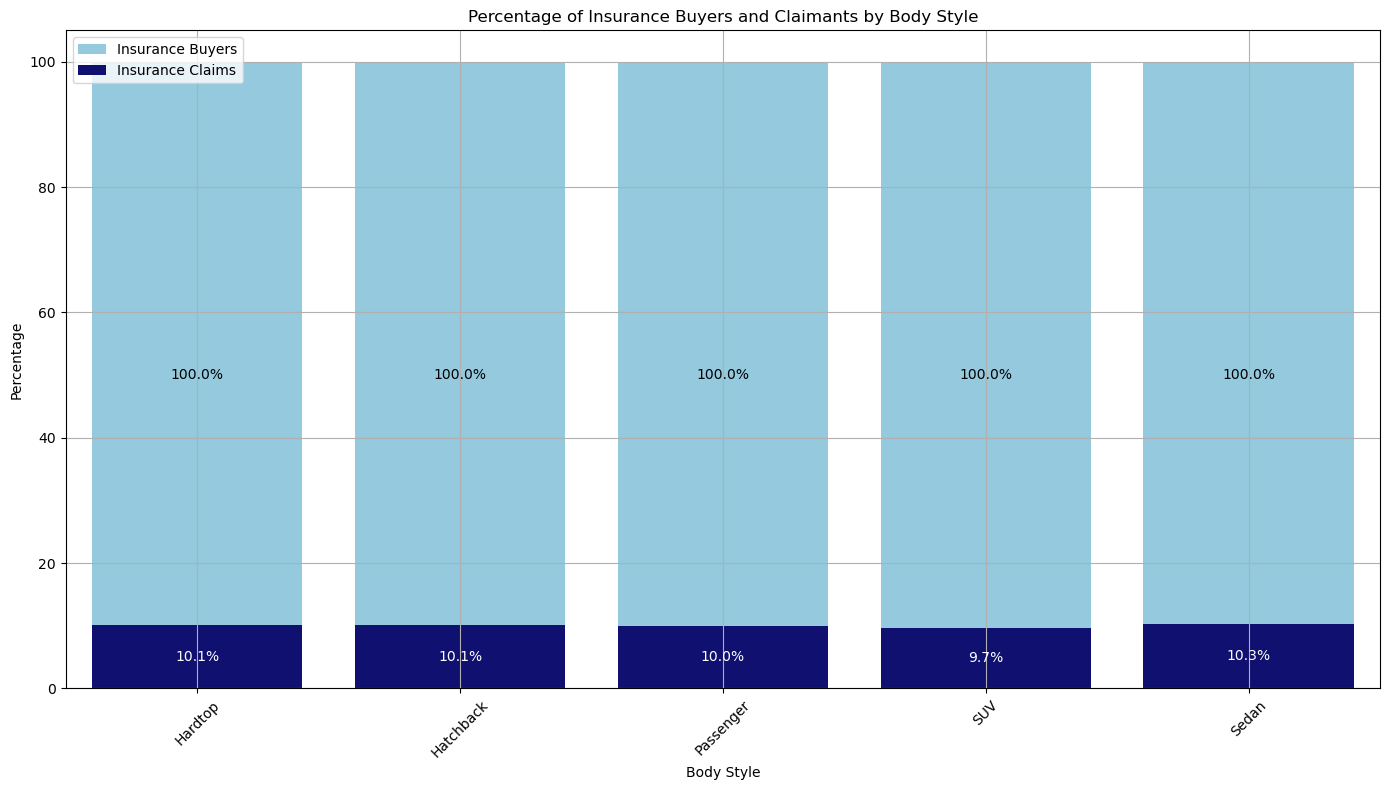

In [62]:

# Group by 'Body Style' and calculate the count of people who bought insurance
insurance_buyers = df.groupby('Body Style')['Amount_paid_for_insurance'].count().reset_index()
insurance_buyers.columns = ['Body Style', 'Insurance Buyers']

# Group by 'Body Style' and calculate the count of people who claimed insurance
insurance_claims = df[df['Claim amount'] > 0].groupby('Body Style')['Claim amount'].count().reset_index()
insurance_claims.columns = ['Body Style', 'Insurance Claims']

# Merge the two dataframes
merged_data = pd.merge(insurance_buyers, insurance_claims, on='Body Style', how='left')
merged_data['Insurance Claims'].fillna(0, inplace=True)

# Calculate the percentages
merged_data['Claim Percentage'] = (merged_data['Insurance Claims'] / merged_data['Insurance Buyers']) * 100
merged_data['Buy Percentage'] = 100  # 100% of the people in the dataset who bought insurance

# Plot the data
plt.figure(figsize=(14, 8))

# Plot the bar for people who bought insurance
bars_buy = sns.barplot(x='Body Style', y='Buy Percentage', data=merged_data, color='skyblue', label='Insurance Buyers')

# Plot the bar for people who claimed insurance
bars_claim = sns.barplot(x='Body Style', y='Claim Percentage', data=merged_data, color='navy', label='Insurance Claims')

# Add annotations
for index, row in merged_data.iterrows():
    bars_buy.text(index, row['Buy Percentage'] / 2, f'{row["Buy Percentage"]:.1f}%', color='black', ha="center", va='center')
    bars_claim.text(index, row['Claim Percentage'] / 2, f'{row["Claim Percentage"]:.1f}%', color='white', ha="center", va='center')

# Add labels and title
plt.xlabel('Body Style')
plt.ylabel('Percentage')
plt.title('Percentage of Insurance Buyers and Claimants by Body Style')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

The above graph displays the percentage of insurance buyers and claimants across different car body styles: Hardtop, Hatchback, Passenger, SUV, and Sedan. 


- **Insurance Buyers:**  All body styles show 100% insurance buyers, indicating that all car owners in the dataset have insurance, regardless of their car's body style. This could suggest a legal requirement for car insurance or a high level of risk awareness among car owners.

- **Insurance Claimants:** There are slight variations in the percentage of claimants across different body styles.
    - Hardtop and Hatchback: 10.1%
    - Passsenger: 10.0%
    - SUV: 9.7%
    - Sedan: 10.3%

- **Claim frequency:**  The differences in claim percentages are relatively small, indicating that the body style of a car doesn't significantly influence the likelihood of filing an insurance claim.  Other factors like driver behavior, road conditions, and the car's age and condition likely play a more significant role in determining claim frequency.

- **SUV claims:**  While SUVs are popular, they have the lowest percentage of claimants (9.7%). This could be because SUVs are often perceived as safer vehicles. However, the difference compared to other body styles is minimal, suggesting that this perception might not be fully reflected in actual claim data.

**possible limitations:**
- **Claim Severity:** We dont have th e information about the severity of claims. It's possible that certain body styles have fewer claims but more expensive ones.
- **Other factors:** Many factors can influence insurance claims, and this graph only focuses on body style.

**Additional Considerations:**

- It would be helpful to analyze the types of claims (like, collision, theft, damage) to understand if body style plays a role in specific claim categories.

So, the graph suggests that while there are slight variations in claim percentages across different body styles, these differences are not substantial. The data indicates that body style alone is not a major predictor of insurance claim frequency.


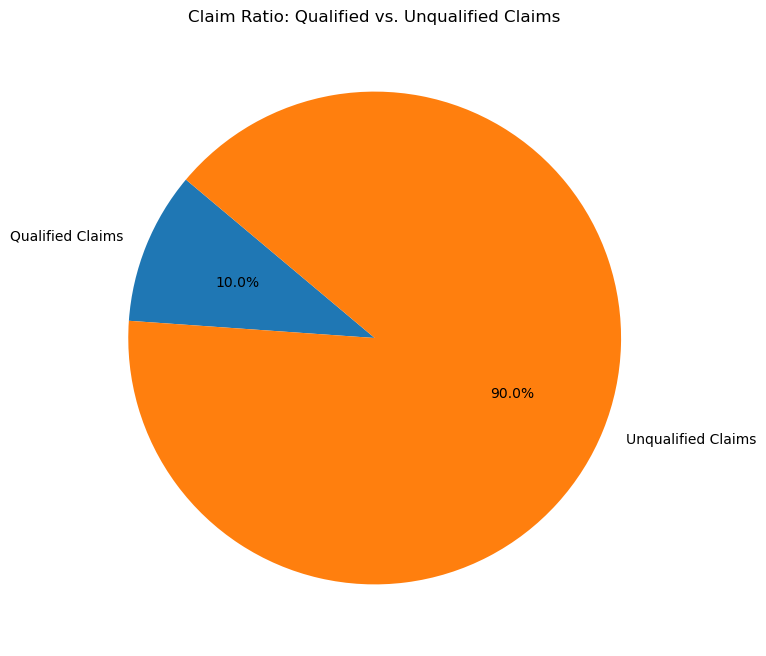

In [79]:
# Calculate claim ratio (qualified vs. unqualified)
qualified_count = df[df['Claim amount'] > 0].shape[0]
unqualified_count = df[df['Claim amount'] == 0].shape[0]
claim_ratio = [qualified_count, unqualified_count]

# Generate pie chart for claim ratio
plt.figure(figsize=(8, 8))
plt.pie(claim_ratio, labels=['Qualified Claims', 'Unqualified Claims'], autopct='%1.1f%%', startangle=140)
plt.title('Claim Ratio: Qualified vs. Unqualified Claims')
plt.show()

Key Insights:

- **Dominance of unqualified Claims:** The vast majority of claims (90%) are classified as unqualified. This indicates a significant issue in the claims process, suggesting that a large proportion of claims do not meet the necessary criteria for approval or further processing.

- **Minority of Qualified Claims:** Only a small fraction of claims (10%) are qualified. This could be due to various reasons such as insufficient documentation, ineligibility based on policy terms, or errors in the initial claim assessment.

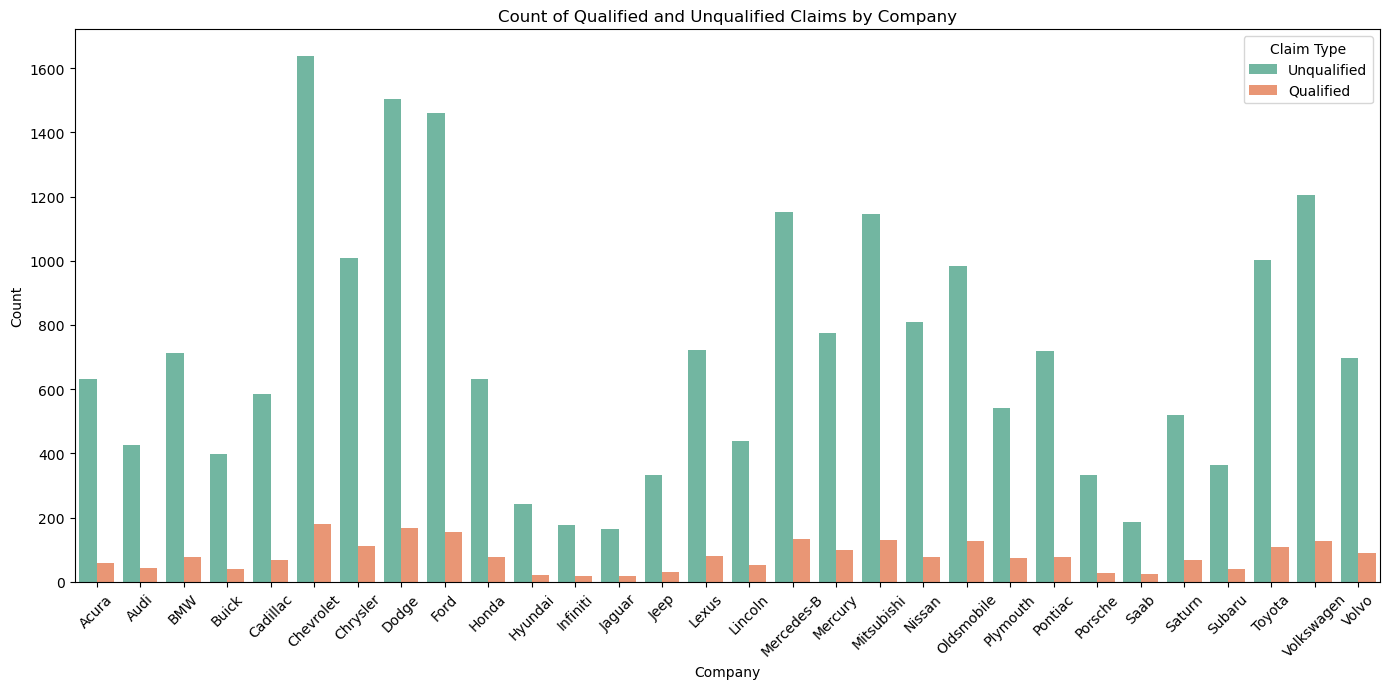

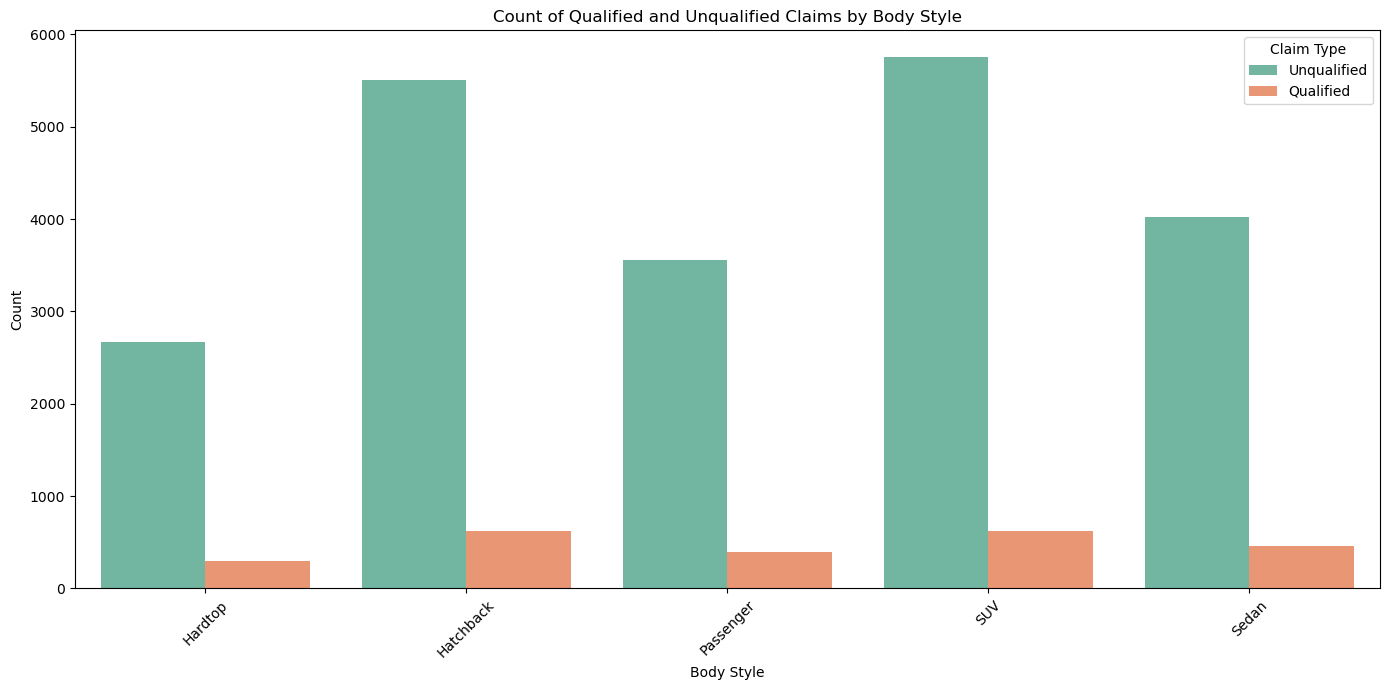

In [81]:
# Create a new column to label qualified and unqualified claims
df['Claim Type'] = df['Claim amount'].apply(lambda x: 'Qualified' if x > 0 else 'Unqualified')

# Plot count of qualified and unqualified claims by Company and Body Style
plt.figure(figsize=(14, 7))
sns.countplot(x='Company', hue='Claim Type', data=df, palette='Set2')
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Count of Qualified and Unqualified Claims by Company')
plt.legend(title='Claim Type', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.countplot(x='Body Style', hue='Claim Type', data=df, palette='Set2')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.title('Count of Qualified and Unqualified Claims by Body Style')
plt.legend(title='Claim Type', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Report on Insurance Claim Analysis**

The provided data encompasses two key aspects of insurance claims:

1.  **Claim Qualification by Car Company:** This analysis reveals a concerning trend across various car companies, where the number of unqualified claims significantly outweighs the number of qualified claims. This indicates a systemic issue within the claims process, suggesting that the majority of claims fail to meet the necessary criteria for approval or further processing. While this issue is prevalent across all companies, Buick stands out with the highest volume of total claims, whereas Saab and Jaguar have the lowest.
2.  **Claim Qualification by Car Body Style:**  Similarly, the analysis by car body style reveals a similar pattern, with unqualified claims outnumbering qualified claims across all categories. Notably, SUVs have the highest number of total claims but a relatively lower proportion of qualified claims. This suggests that SUV owners might be more prone to filing claims, but their claims are less likely to be successful compared to other body styles.

**Potential Causes of unqualified Claims**

Several factors could contribute to the high number of unqualified claims:

*   **Policy Exclusions:** Claims may fall outside the coverage of the insurance policy.
*   **documentation:** Claimants may not provide enough evidence to support their claim.
*   **Fraudulent Claims:** Some claims might be deliberately fabricated or exaggerated.

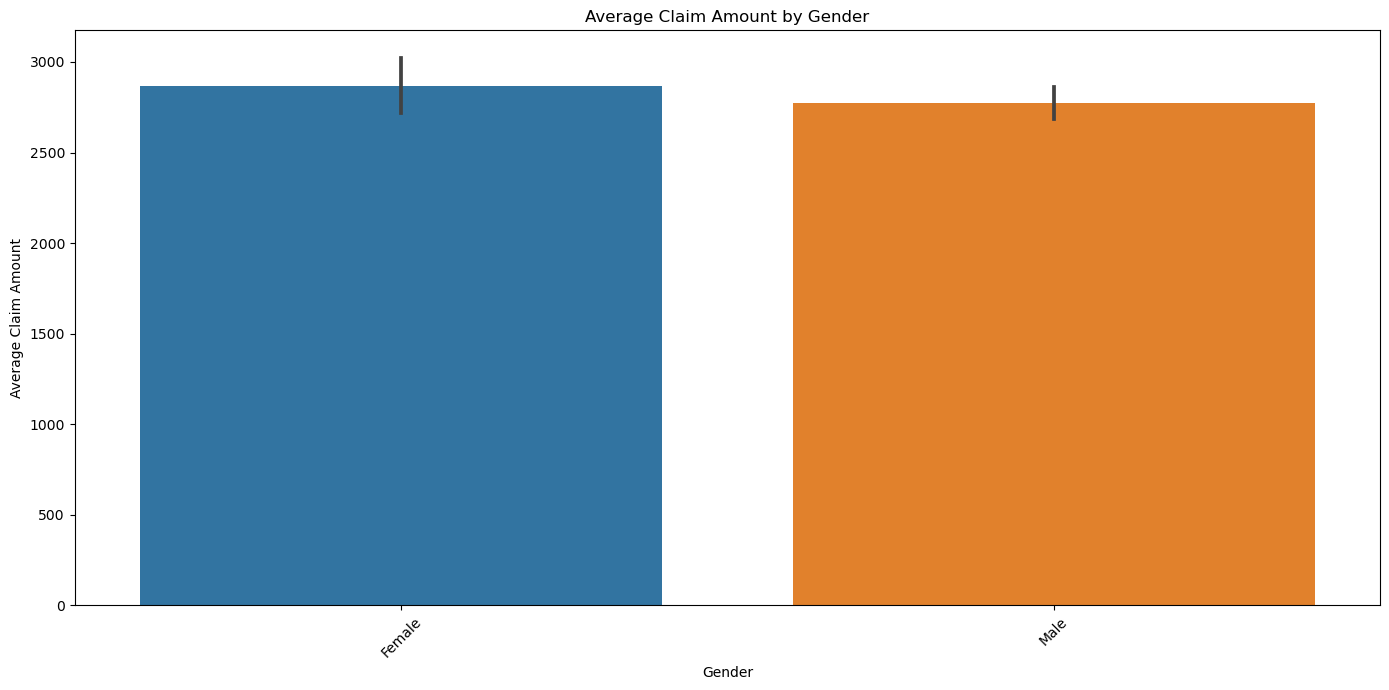

/Users/wenda/anaconda3/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning:

Mean of empty slice



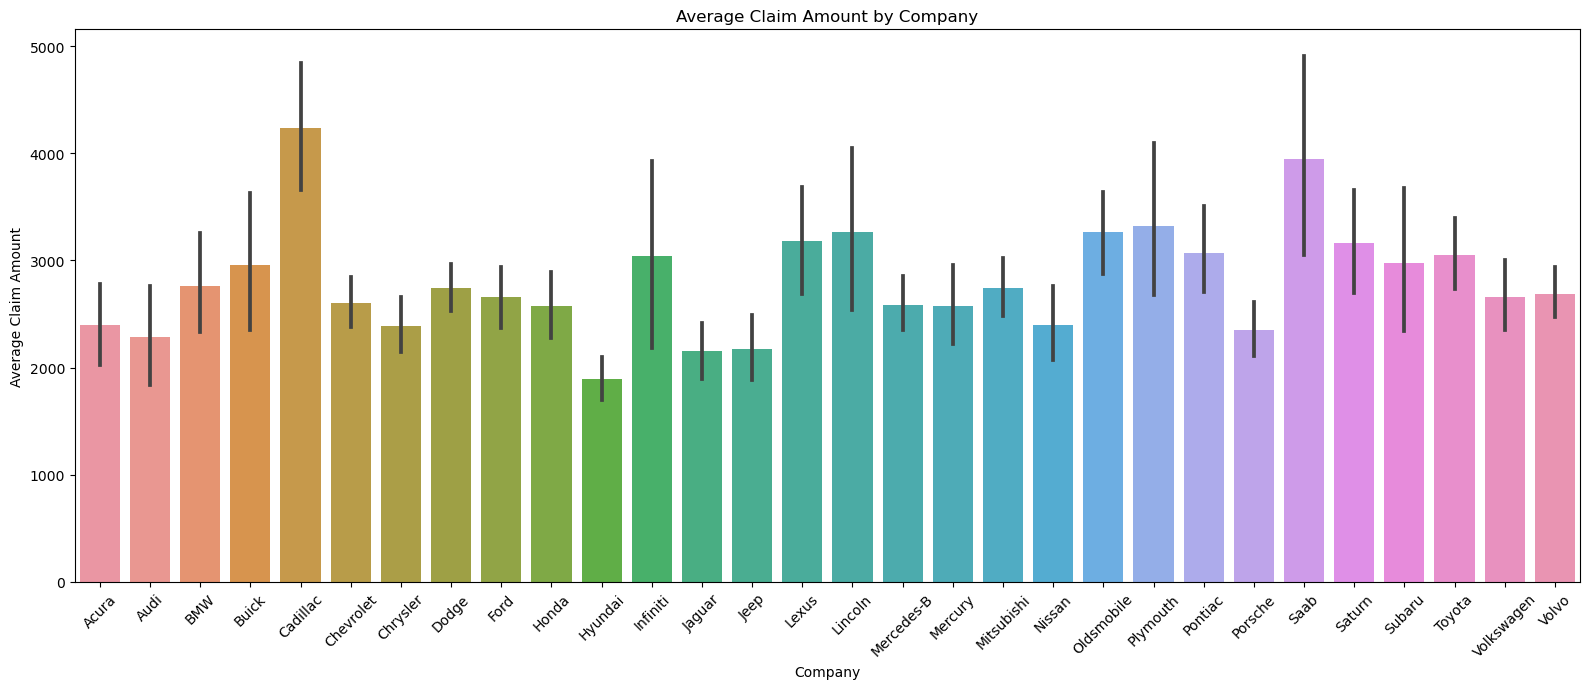

/Users/wenda/anaconda3/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning:

Mean of empty slice

/Users/wenda/anaconda3/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning:

Mean of empty slice

/Users/wenda/anaconda3/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning:

Mean of empty slice

/Users/wenda/anaconda3/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning:

Mean of empty slice

/Users/wenda/anaconda3/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning:

Mean of empty slice

/Users/wenda/anaconda3/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning:

Mean of empty slice

/Users/wenda/anaconda3/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning:

Mean of empty slice

/Users/wenda/anaconda3/lib/python3.11/site-packages/seaborn/algorithms.py:98: RuntimeWarning:

Mean of empty slice

/Users/wenda/anaconda3/lib/python3.11/site-packages/seaborn/algorithms.p

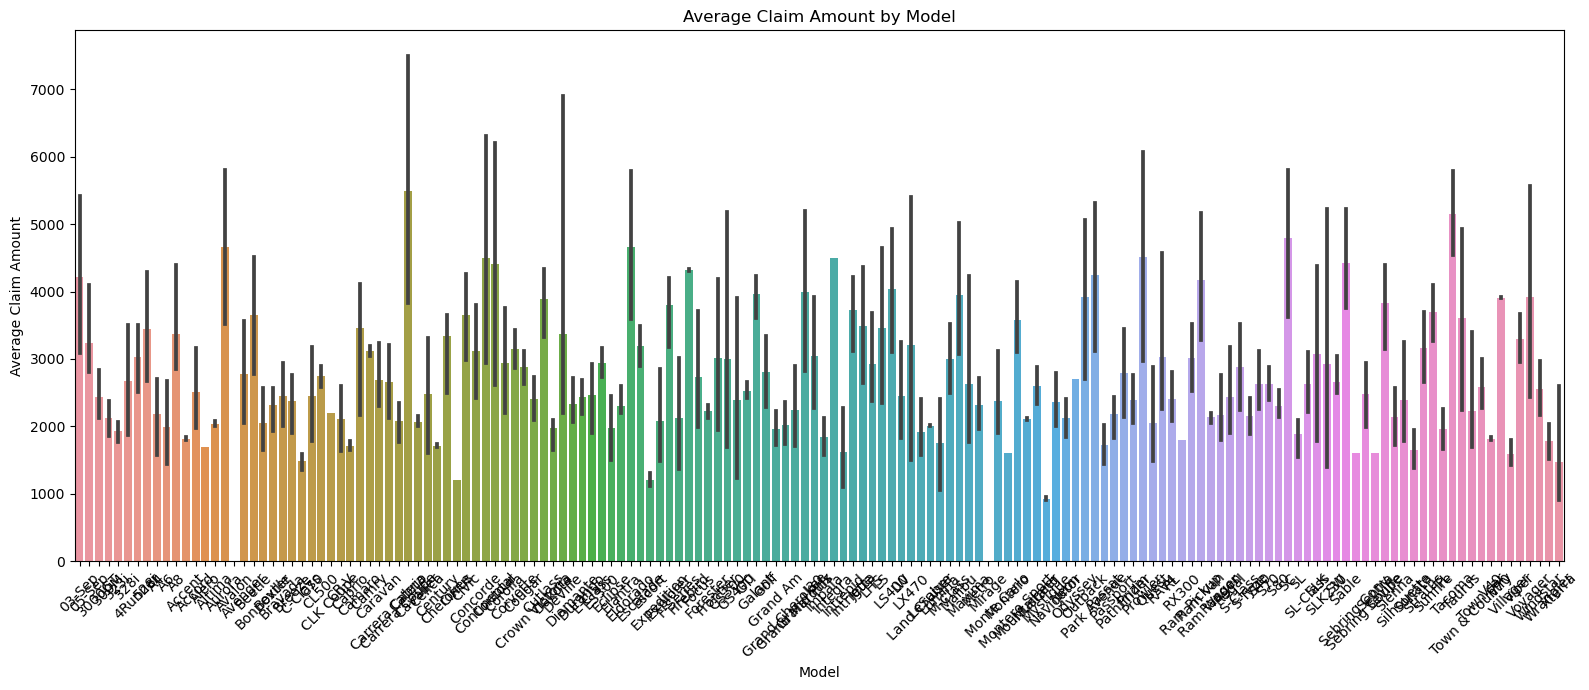

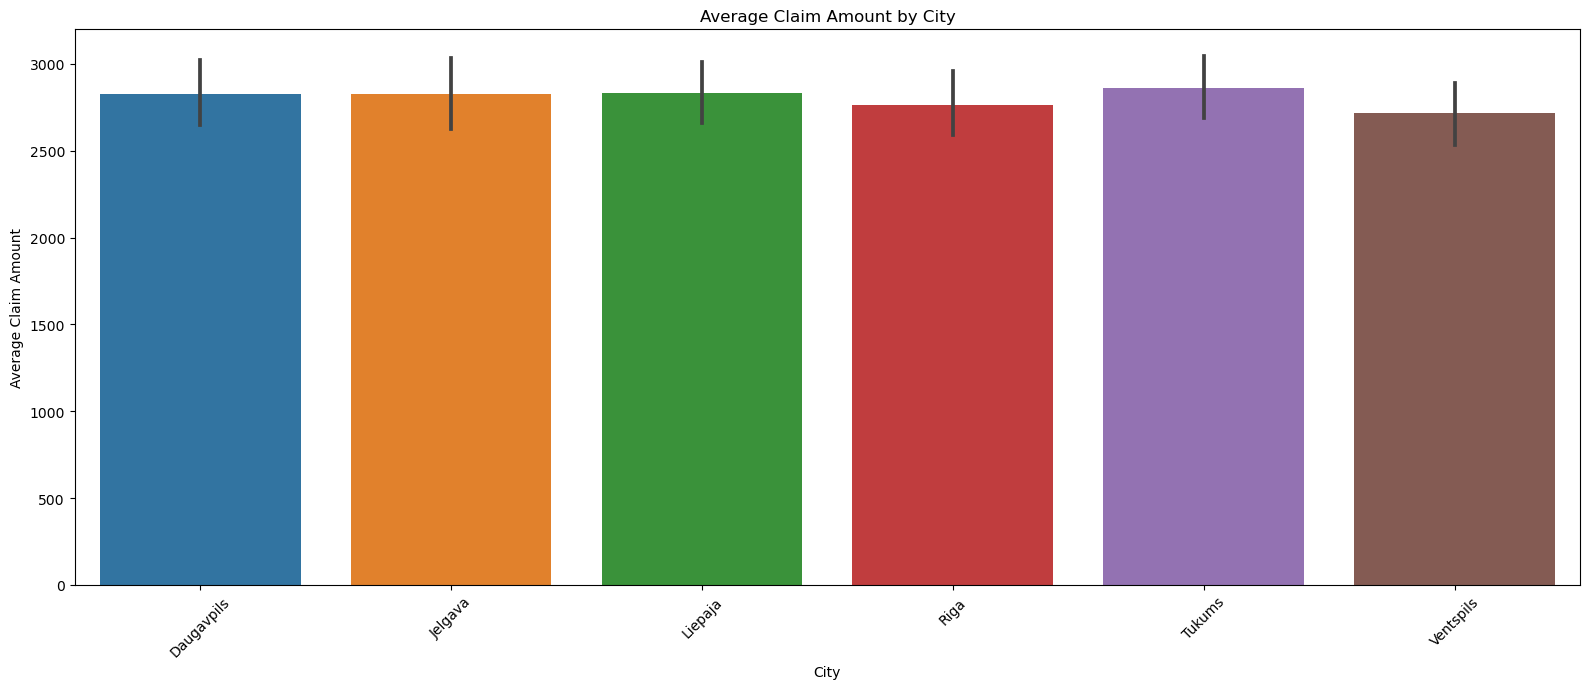

In [84]:
# Create a new column to label qualified and unqualified claims
df['Claim Type'] = df['Claim amount'].apply(lambda x: 'Qualified' if x > 0 else 'Unqualified')

# Filter DataFrame to include only qualified claims
qualified_claims = df[df['Claim Type'] == 'Qualified']

# Calculate the average value of qualified claims with respect to gender, company, model, and city
average_claim_values = qualified_claims.groupby(['Gender', 'Company', 'Model', 'City'])['Claim amount'].mean().reset_index()

# Plot the average claim values
plt.figure(figsize=(14, 7))
sns.barplot(x='Gender', y='Claim amount', data=average_claim_values)
plt.xlabel('Gender')
plt.ylabel('Average Claim Amount')
plt.title('Average Claim Amount by Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 7))
sns.barplot(x='Company', y='Claim amount', data=average_claim_values)
plt.xlabel('Company')
plt.ylabel('Average Claim Amount')
plt.title('Average Claim Amount by Company')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 7))
sns.barplot(x='Model', y='Claim amount', data=average_claim_values)
plt.xlabel('Model')
plt.ylabel('Average Claim Amount')
plt.title('Average Claim Amount by Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 7))
sns.barplot(x='City', y='Claim amount', data=average_claim_values)
plt.xlabel('City')
plt.ylabel('Average Claim Amount')
plt.title('Average Claim Amount by City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Financial Risk Forecasting and Ideal Customer Profile Report**

The comprehensive analysis of car insurance data has yielded valuable insights into financial risk forecasting and the identification of ideal customer profiles (ICPs). This report summarizes the key findings and their implications for strategic decision-making.

**Financial Risk Forecasting:**

1.  **Claim Trends:** The analysis of claims over time reveals significant fluctuations in both claim amounts and claim count, with a general upward trend. These fluctuations may be attributed to seasonality, external events, or changes in internal processes. Understanding these patterns is crucial for accurate risk forecasting and resource allocation.

2.  **Claim Qualification:** A notable concern is the high proportion of unqualified claims across various car companies and body styles. This indicates potential issues in the claims process, such as policy exclusions, insufficient documentation, fraudulent claims, or administrative errors. Addressing these issues can improve operational efficiency and reduce financial risk.

3.  **Risk Factors:** The analysis highlights the complex interplay of factors influencing claim frequency and severity. While car attributes like body style and company play a minor role, other factors such as driver behavior, location, and policy coverage are likely more significant. Incorporating these factors into risk models can enhance their predictive accuracy.

**Ideal Customer Profile (ICP):**

1.  **Demographic Factors:** The data reveals variations in annual income and car preferences across different customer segments. For instance, SUV owners tend to have slightly higher incomes, while customers of luxury car brands exhibit higher income levels overall.

2.  **Geographic Location:** The analysis of claims by city indicates that location plays a role in claim frequency and severity. Understanding regional variations can help tailor insurance offerings and pricing strategies accordingly. We saw in the given cities, the claim ration was similar.

3.  **Behavioral Factors:** While not explicitly captured in the data, behavioral factors such as driving habits and adherence to traffic rules are crucial determinants of risk. Integrating telematics data or partnering with driving behavior monitoring platforms can provide valuable insights into these aspects.
